<a href="https://colab.research.google.com/github/Sanketkamble01/Email_Campaign_Effectiveness_Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
































# **Project Name**    -   <font color='#FF3206'>Email Campaign Effectiveness Prediction



##### **Project Type**    - Supervised ML -Classification
##### **Contribution**    - Individual
##### **Contributor**     - Sanket kamble

# **Project Summary -**

This project is completely based on ML classification model algorithm and Python coding. It examines the concept and evaluates the problem.The aim of this project was to develop a machine learning model that could be used to identify emails and monitor their reception—that is, whether the recipient read, ignored, or acknowledged them. Email type, subject hotness score, email source type, customer location, email campaign type, total past communications, time email sent category, word count, total links, total photos, and email status were among the details included in the dataset.


One of the biggest challenges in email marketing is determining which emails read, delete, or are recognized by readers. By understanding which emails attract the most readers, business owners can adjust their email marketing strategy and increase the chances of success.

We collect information about a wide range of email attributes, including the subject line, the sender name, the email content, the email format, and the email frequency. We’ll also consider the email’s intended audience and any other relevant information.

Using this data, we’ll use machine learning to train a model to identify which emails are more likely to be read, ignored, or acknowledged by the recipient. The model will evaluate new emails to predict potential reader reactions.

To compare the model's performance between the training and testing sets, we will divide our data into them. The model will be fit using the training set, while its performance will be evaluated using the testing set.Metrics like precision, recall, and F1 score will be used to assess the model's effectiveness and accuracy.


Ultimately, the information gleaned from the exploratory data analysis was condensed into visuals that offered small- to medium-sized business owners practical advice on how to enhance their email marketing tactics. All things considered, the experiment proved how well machine learning can track and characterize emails and how these models can be used to enhance business results.


# **GitHub Link -**

https://github.com/Sanketkamble01/Email_Campaign_Effectiveness_Prediction

# **Problem Statement**


**Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#data reding and manipulation
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

#for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap

#adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

#ignore warning
import warnings
warnings.filterwarnings('ignore')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.9 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
# read CSV files
df = pd.read_csv('/content/drive/MyDrive/Capstone project 3/data_email_campaign.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                   2.20                  2   
1  EMA00081000045360           2                   2.10                  1   
2  EMA00081000066290           2                   0.10                  1   
3  EMA00081000076560           1                   3.00                  2   
4  EMA00081000109720           1                   0.00                  2   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                      33.00   
1               NaN                    2                      15.00   
2                 B                    3                      36.00   
3                 E                    2                      25.00   
4                 C                    3                      18.00   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1         440         8.00          0.00   
1                         2         504         5.00          0.00   
2                         2         962         5.00          0.00   
3                         2         610        16.00          0.00   
4                         2         947         4.00          0.00   

   Email_Status  
0             0  
1             0  
2             1  
3             0  
4             0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'The dataset have total {df.shape[0]} rows and {df.shape[1]} columns')

The dataset have total 68353 rows and 12 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
68348    False
68349    False
68350    False
68351    False
68352    False
Length: 68353, dtype: bool

In [ ]:
print(f'Dataset Duplicate Value Count is {len(df[df.duplicated()])}')

Dataset Duplicate Value Count is 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

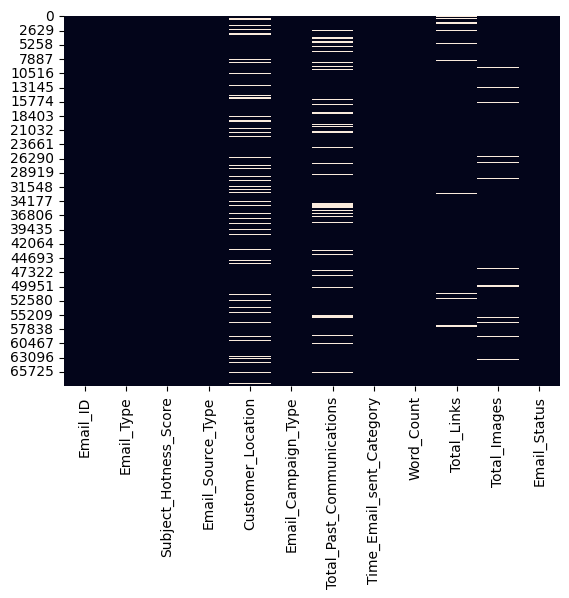

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False);

### What did you know about your dataset?

* 12 features and a total of 68353 observations are included in the dataset.
*  A combination of integer, float, and object data types compose the dataset
* The dataset is free of bias since all of the values are unique, meaning there are no duplicates. Duplicates might skew results in downstream studies or make it challenging to appropriately summarize the data

* There is null value attached to features such as customer location (111595), total past communication (625), total link (2201), and total images (1677).



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns.to_list()

['Email_ID',
 'Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [ ]:
# Dataset Describe
df.describe()

Email_Type  Subject_Hotness_Score  Email_Source_Type  \
count    68353.00               68353.00           68353.00   
mean         1.29                   1.10               1.46   
std          0.45                   1.00               0.50   
min          1.00                   0.00               1.00   
25%          1.00                   0.20               1.00   
50%          1.00                   0.80               1.00   
75%          2.00                   1.80               2.00   
max          2.00                   5.00               2.00   

       Email_Campaign_Type  Total_Past_Communications  \
count             68353.00                   61528.00   
mean                  2.27                      28.93   
std                   0.47                      12.54   
min                   1.00                       0.00   
25%                   2.00                      20.00   
50%                   2.00                      28.00   
75%                   3.00                      38.00   
max                   3.00                      67.00   

       Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
count                  68353.00    68353.00     66152.00      66676.00   
mean                       2.00      699.93        10.43          3.55   
std                        0.63      271.72         6.38          5.60   
min                        1.00       40.00         1.00          0.00   
25%                        2.00      521.00         6.00          0.00   
50%                        2.00      694.00         9.00          0.00   
75%                        2.00      880.00        14.00          5.00   
max                        3.00     1316.00        49.00         45.00   

       Email_Status  
count      68353.00  
mean           0.23  
std            0.50  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max            2.00

### Variables Description

**Attribute Information ▶**

---
* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2.They can be classified as marketing emails or important updates and notices, just like business emails.
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'Number of unique values in {i} is : {df[i].nunique()}.')

Number of unique values in Email_ID is : 68353.
Number of unique values in Email_Type is : 2.
Number of unique values in Subject_Hotness_Score is : 51.
Number of unique values in Email_Source_Type is : 2.
Number of unique values in Customer_Location is : 7.
Number of unique values in Email_Campaign_Type is : 3.
Number of unique values in Total_Past_Communications is : 64.
Number of unique values in Time_Email_sent_Category is : 3.
Number of unique values in Word_Count is : 151.
Number of unique values in Total_Links is : 37.
Number of unique values in Total_Images is : 45.
Number of unique values in Email_Status is : 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Check Shape of Email ignored, Read, acknowledge

print("Number of Email Ignored :",len(df[df['Email_Status'] == 0]))
print("Number of Email Read :",len(df[df['Email_Status'] == 1]))
print("Number of Email Acknowledged :",len(df[df['Email_Status'] == 2]))

Number of Email Ignored : 54941
Number of Email Read : 11039
Number of Email Acknowledged : 2373


In [ ]:
# Email Status by Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Source_Type  Email_Status  Count
0                  1             0  29577
1                  1             1   6150
2                  1             2   1422
3                  2             0  25364
4                  2             1   4889
5                  2             2    951

In [ ]:
# Email Status by Email_Type
pd.DataFrame(df.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Type  Email_Status  Count
0           1             0  39004
1           1             1   8208
2           1             2   1654
3           2             0  15937
4           2             1   2831
5           2             2    719

In [ ]:
# Email Status by Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

Customer_Location  Email_Status  Count
0                  A             0   1160
1                  A             1    245
2                  A             2     49
3                  B             0   3502
4                  B             1    714
5                  B             2    125
6                  C             0   4654
7                  C             1    890
8                  C             2    214
9                  D             0   5950
10                 D             1   1206
11                 D             2    250
12                 E             0   8136
13                 E             1   1693
14                 E             2    364
15                 F             0   3579
16                 F             1    698
17                 F             2    156
18                 G             0  18609
19                 G             1   3745
20                 G             2    819

In [ ]:
# Email Status by Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Campaign_Type  Email_Status  Count
0                    1             1    486
1                    1             2    173
2                    1             0     77
3                    2             0  42115
4                    2             1   5446
5                    2             2    712
6                    3             0  12749
7                    3             1   5107
8                    3             2   1488

In [ ]:
# Email Status by Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

Time_Email_sent_Category  Email_Status  Count
0                         1             0  10970
1                         1             1   2186
2                         1             2    480
3                         2             0  33062
4                         2             1   6631
5                         2             2   1436
6                         3             0  10909
7                         3             1   2222
8                         3             2    457

In [ ]:
#To store numerical feature creating variable
nume_fe = df.select_dtypes(include = 'float').columns.to_list()
nume_fe.append('Word_Count')
nume_fe

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [ ]:
#To store categorial features creating variable
cate_fe = [f for f in df.columns if f not in nume_fe]
cate_fe

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [ ]:
#find count, sum, mean and median based on Email Type
df.groupby('Email_Type')[nume_fe].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     48866.00    19487.00
                          sum       60780.70    14098.70
                          mean          1.24        0.72
                          median        1.10        0.30
Total_Past_Communications count     44065.00    17463.00
                          sum     1291275.00   488930.00
                          mean         29.30       28.00
                          median       29.00       28.00
Total_Links               count     47286.00    18866.00
                          sum      524149.00   165785.00
                          mean         11.08        8.79
                          median        9.00        8.00
Total_Images              count     47655.00    19021.00
                          sum      187546.00    49199.00
                          mean          3.94        2.59
                          median        1.00        0.00
Word_Count                count     48866.00    19487.00
                          sum    33549373.00 14293062.00
                          mean        686.56      733.47
                          median      678.00      722.00

In [ ]:
#find count, sum, mean and median based on Email_Source_Type
df.groupby('Email_Source_Type')[nume_fe].agg(['count','sum','mean','median']).T

Email_Source_Type                          1           2
Subject_Hotness_Score     count     37149.00    31204.00
                          sum       40487.40    34392.00
                          mean          1.09        1.10
                          median        0.80        0.80
Total_Past_Communications count     33353.00    28175.00
                          sum      991852.00   788353.00
                          mean         29.74       27.98
                          median       30.00       27.00
Total_Links               count     35950.00    30202.00
                          sum      362804.00   327130.00
                          mean         10.09       10.83
                          median        9.00        9.00
Total_Images              count     36244.00    30432.00
                          sum      121422.00   115323.00
                          mean          3.35        3.79
                          median        0.00        0.00
Word_Count                count     37149.00    31204.00
                          sum    25554766.00 22287669.00
                          mean        687.90      714.26
                          median      684.00      704.00

In [ ]:
#find count, sum, mean and median based on Customer_Location
df.groupby('Customer_Location')[nume_fe].agg(['count','sum','mean','median']).T

Customer_Location                         A          B          C          D  \
Subject_Hotness_Score     count     1454.00    4341.00    5758.00    7406.00   
                          sum       1644.40    4847.90    6351.10    8187.80   
                          mean         1.13       1.12       1.10       1.11   
                          median       0.90       0.90       0.80       0.80   
Total_Past_Communications count     1300.00    3939.00    5183.00    6625.00   
                          sum      36970.00  113462.00  149572.00  190223.00   
                          mean        28.44      28.80      28.86      28.71   
                          median      27.00      28.00      28.00      28.00   
Total_Links               count     1407.00    4205.00    5573.00    7157.00   
                          sum      14587.00   43979.00   58697.00   74548.00   
                          mean        10.37      10.46      10.53      10.42   
                          median       9.00       9.00       9.00       9.00   
Total_Images              count     1416.00    4236.00    5606.00    7244.00   
                          sum       4795.00   15434.00   20202.00   25471.00   
                          mean         3.39       3.64       3.60       3.52   
                          median       0.00       0.00       0.00       0.00   
Word_Count                count     1454.00    4341.00    5758.00    7406.00   
                          sum    1004166.00 3045906.00 4053360.00 5183849.00   
                          mean       690.62     701.66     703.95     699.95   
                          median     694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count    10193.00    4433.00    23173.00  
                          sum      11116.40    4794.40    25240.40  
                          mean         1.09       1.08        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     9170.00    3980.00    20918.00  
                          sum     267177.00  115036.00   605727.00  
                          mean        29.14      28.90       28.96  
                          median      29.00      28.00       29.00  
Total_Links               count     9872.00    4311.00    22429.00  
                          sum     102092.00   45631.00   233246.00  
                          mean        10.34      10.58       10.40  
                          median       9.00       9.00        9.00  
Total_Images              count     9938.00    4319.00    22614.00  
                          sum      34813.00   15949.00    79875.00  
                          mean         3.50       3.69        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count    10193.00    4433.00    23173.00  
                          sum    7128244.00 3099054.00 16263635.00  
                          mean       699.33     699.09      701.84  
                          median     694.00     694.00      694.00

In [ ]:
#find count, sum, mean and median based on Email_Campaign_Type
df.groupby('Email_Campaign_Type')[nume_fe].agg(['count','sum','mean','median']).T

Email_Campaign_Type                      1           2           3
Subject_Hotness_Score     count     736.00    48273.00    19344.00
                          sum       111.70    71869.60     2898.10
                          mean        0.15        1.49        0.15
                          median      0.20        1.40        0.10
Total_Past_Communications count     657.00    43475.00    17396.00
                          sum         0.00  1165934.00   614271.00
                          mean        0.00       26.82       35.31
                          median      0.00       26.00       36.00
Total_Links               count     706.00    46727.00    18719.00
                          sum       706.00   499701.00   189527.00
                          mean        1.00       10.69       10.12
                          median      1.00        9.00        9.00
Total_Images              count     722.00    47106.00    18848.00
                          sum         0.00   173880.00    62865.00
                          mean        0.00        3.69        3.34
                          median      0.00        0.00        0.00
Word_Count                count     736.00    48273.00    19344.00
                          sum    482278.00 33300455.00 14059702.00
                          mean      655.27      689.84      726.82
                          median    662.00      684.00      721.00

In [ ]:
#find count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[nume_fe].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count    13636.00    41129.00   13588.00
                          sum      15187.00    44715.70   14976.70
                          mean         1.11        1.09       1.10
                          median       0.90        0.80       0.80
Total_Past_Communications count    12244.00    37046.00   12238.00
                          sum     353375.00  1074034.00  352796.00
                          mean        28.86       28.99      28.83
                          median      28.00       28.00      28.00
Total_Links               count    13191.00    39798.00   13163.00
                          sum     138427.00   413904.00  137603.00
                          mean        10.49       10.40      10.45
                          median       9.00        9.00       9.00
Total_Images              count    13306.00    40118.00   13252.00
                          sum      47361.00   142188.00   47196.00
                          mean         3.56        3.54       3.56
                          median       0.00        0.00       0.00
Word_Count                count    13636.00    41129.00   13588.00
                          sum    9522852.00 28836283.00 9483300.00
                          mean       698.36      701.12     697.92
                          median     694.00      694.00     694.00

In [ ]:
#Analyz mean median and sum based on Email Acknowledged with respect to numerical features
df[df['Email_Status'] == 2][nume_fe].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score        1154.00   0.49    0.20
Total_Past_Communications   79818.00  37.60   40.00
Total_Links                 24037.00  10.47    9.00
Total_Images                 8547.00   3.69    0.00
Word_Count                1472720.00 620.62  610.00

In [ ]:
#Analyze mean median and sum based on Email Opened with respect to numerical features
df[df['Email_Status'] == 1][nume_fe].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score       10018.10   0.91    0.30
Total_Past_Communications  345204.00  34.71   36.00
Total_Links                105294.00   9.85    9.00
Total_Images                34296.00   3.19    0.00
Word_Count                6523382.00 590.94  578.00

In [ ]:
#Analyze mean median and sum based on Email Ignored with respect to numerical features
df[df['Email_Status'] == 0][nume_fe].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score        63707.30   1.16    1.00
Total_Past_Communications  1355183.00  27.40   26.00
Total_Links                 560603.00  10.54    9.00
Total_Images                193902.00   3.62    0.00
Word_Count                39846333.00 725.26  713.00

In [ ]:
#Analyze mean median sum and count based on Email Acknowledged with respect to different category
for cate in cate_fe:
  if (cate == 'Email_Status') | (cate == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cate} \n')
    print(df[df['Email_Status'] == 2].groupby(cate)[nume_fe].agg(['sum','mean','median']).T)
    print('='*120)

Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       984.70    169.30
                          mean        0.60      0.24
                          median      0.30      0.20
Total_Past_Communications sum     59238.00  20580.00
                          mean       40.08     31.91
                          median     41.00     36.00
Total_Links               sum     17978.00   6059.00
                          mean       11.22      8.74
                          median     11.00      8.00
Total_Images              sum      6612.00   1935.00
                          mean        4.09      2.77
                          median      1.00      0.00
Word_Count                sum    990293.00 482427.00
                          mean      598.73    670.97
                          median    593.00    655.00
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

In [ ]:
#Analy mean median sum and count based on Email Opened
for cate in cate_fe:
  if (cate == 'Email_Status') | (cate == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cate} \n')
    print(df[df['Email_Status']== 1].groupby(cate)[nume_fe].agg(['sum','mean','median']).T)
    print('='*120)

Email Opened based on Email_Type 

Email_Type                                1          2
Subject_Hotness_Score     sum       8861.20    1156.90
                          mean         1.08       0.41
                          median       0.70       0.20
Total_Past_Communications sum     261208.00   83996.00
                          mean        35.32      32.94
                          median      36.00      35.00
Total_Links               sum      83273.00   22021.00
                          mean        10.48       8.05
                          median       9.00       8.00
Total_Images              sum      28433.00    5863.00
                          mean         3.55       2.13
                          median       0.00       0.00
Word_Count                sum    4697752.00 1825630.00
                          mean       572.34     644.87
                          median     565.00     636.00
Email Opened based on Email_Source_Type 

Email_Source_Type                         1

In [ ]:
#Analyze mean median sum and count based on Email Ignored
for cate in cate_fe:
  if (cate == 'Email_Status') | (cate == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cate} \n')
    print(df[df['Email_Status'] == 0].groupby(cate)[nume_fe].agg(['sum','mean','median']).T)
    print('='*120)

Email Ignored based on Email_Type 

Email_Type                                 1           2
Subject_Hotness_Score     sum       50934.80    12772.50
                          mean          1.31        0.80
                          median        1.20        0.40
Total_Past_Communications sum      970829.00   384354.00
                          mean         27.59       26.94
                          median       26.00       26.00
Total_Links               sum      422898.00   137705.00
                          mean         11.21        8.92
                          median       10.00        8.00
Total_Images              sum      152501.00    41401.00
                          mean          4.01        2.66
                          median        1.00        0.00
Word_Count                sum    27861328.00 11985005.00
                          mean        714.32      752.02
                          median      700.00      737.00
Email Ignored based on Email_Source_Type 

Email_Sou

In [ ]:
#calculate engagement rate based on email acknowledged by the readers
engagement_rate = df[df['Email_Status'] == 2]['Email_Status'].count()/len(df)*100
print(f'The engagement rate is :' ,engagement_rate)

The engagement rate is : 3.4716837593082963


In [ ]:
#calculate open rate based on email read and acknowledged by the readers
open_rate = df[df['Email_Status'] != 0]['Email_Status'].count()/len(df)*100
print(f'The open rate is :' ,open_rate)

The open rate is : 19.62166986086931


In [ ]:
#calculate ignored rate based on email read and acknowledged by the readers
ignored_rate = df[df['Email_Status'] == 0]['Email_Status'].count()/len(df)*100
print(f'The ignored rate is :' ,ignored_rate)

The ignored rate is : 80.3783301391307


In [ ]:
# function to calculate  open rate, engagement rate and ignored rate
#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [ ]:
# calculating engagement, open and ignored rate for each categorial feaure
for cate in cate_fe:
  if (cate == 'Email_Status') | (cate == 'Email_ID'):
    pass
  else:
    print(f'Open Rate for : {cate}')
    print(df.groupby(cate).apply(Open))
    print('\n')
    print(f'Engagement Rate for : {cate}')
    print(df.groupby(cate).apply(Engagement))
    print('\n')
    print(f'Ignored Rate for : {cate}')
    print(df.groupby(cate).apply(Ignore))
    print('='*120)

Open Rate for : Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Engagement Rate for : Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Ignored Rate for : Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Open Rate for : Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Engagement Rate for : Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Ignored Rate for : Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Open Rate for : Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.19
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Engagement Rate for : Customer_Location
Customer_Location
A   0.03
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.04
dtype: float64


Ignored Rate for : Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.81
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Open Rate for : Email_Campaign_Type
Email_Campaign_Type
1   0.90
2   0.13
3   0.34
dtype: float64


Eng

In [ ]:
# Link-to-Word ratio
df_Link_to_Word_ratio = df['Total_Links'] / df['Word_Count']

# Image-to-Word ratio
df_Image_to_Word_ratio = df['Total_Images'] / df['Word_Count']

# Image-Link-Word ratio
df_Image_Link_Word_ratio = df['Total_Images'] + df['Total_Links'] / df['Word_Count']

# Percentage of words that are links
df_Percentage_of_words_that_are_links = (df['Total_Links'] / df['Word_Count'])*100

# Number of Images per link
df_Number_of_Images_per_link = df['Total_Images'] / df['Total_Links']

# Calculating the weighted sum of Subject_Hotness_Score and Total_Past_Communications
df_Hotness_Score = df['Subject_Hotness_Score'] * df['Total_Past_Communications']

In [ ]:
# Image-Link-Word ratio
df_Image_Link_Word_ratio.mean()

3.56208687250181

In [ ]:
# Image-to-Word ratio
df_Image_to_Word_ratio.mean()

0.006425172246013729

In [ ]:
#Link_to_Word_ratio
df_Link_to_Word_ratio.mean()

0.019561519413416703

In [ ]:
#Percentage_of_words_that_are_links
df_Percentage_of_words_that_are_links.mean()

1.9561519413416701

In [ ]:
# Number of Images per link
df_Number_of_Images_per_link.mean()

0.24534715873562615

In [ ]:
#Hotness score
df_Hotness_Score.mean()

26.159572877389156

### What all manipulations have you done and insights you found?

In order to analyze the effectiveness of an email campaign, I first analyzed the engagement and response rates of the emails sent and the result is here

> * Number of Email Ignored : 54941
> * Number of Email Read : 11039
> * Number of Email Acknowledged : 2373

The majority of emails were ignored, as shown in this result. To gain insight into why this was the case, I experimented with different categorizations of categorical features. I grouped the emails by categorical features and analyzed the relationship between these features and email engagement. I also looked at the rate of email opens, ignores, and acknowledgements for each categorical variable.

Next, the link and image densities were computed in relation to the total word count. Once again, the percentage of each in relation to wordcount was determined using the image and link. In order to determine the combined weight, the subject hotness score and the total past communication were combined.

The analysis shows that for an email to be recognized, the average email must have a total of at least 37 communications, which is relatively more than  ignored emails, suggesting that emails are recognized depending on the level of engagement . Other features like word count show that the average number of words recognized is 590-600  and it should also contain a maximum of 10 links and 3 images.

After analyzing these variables, I discovered that sending type 1 emails with a source location of 2 and campaign type 1  early morning in the day was quite successful with high acknowledged emails.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distplot:  Continous Variables Distribution

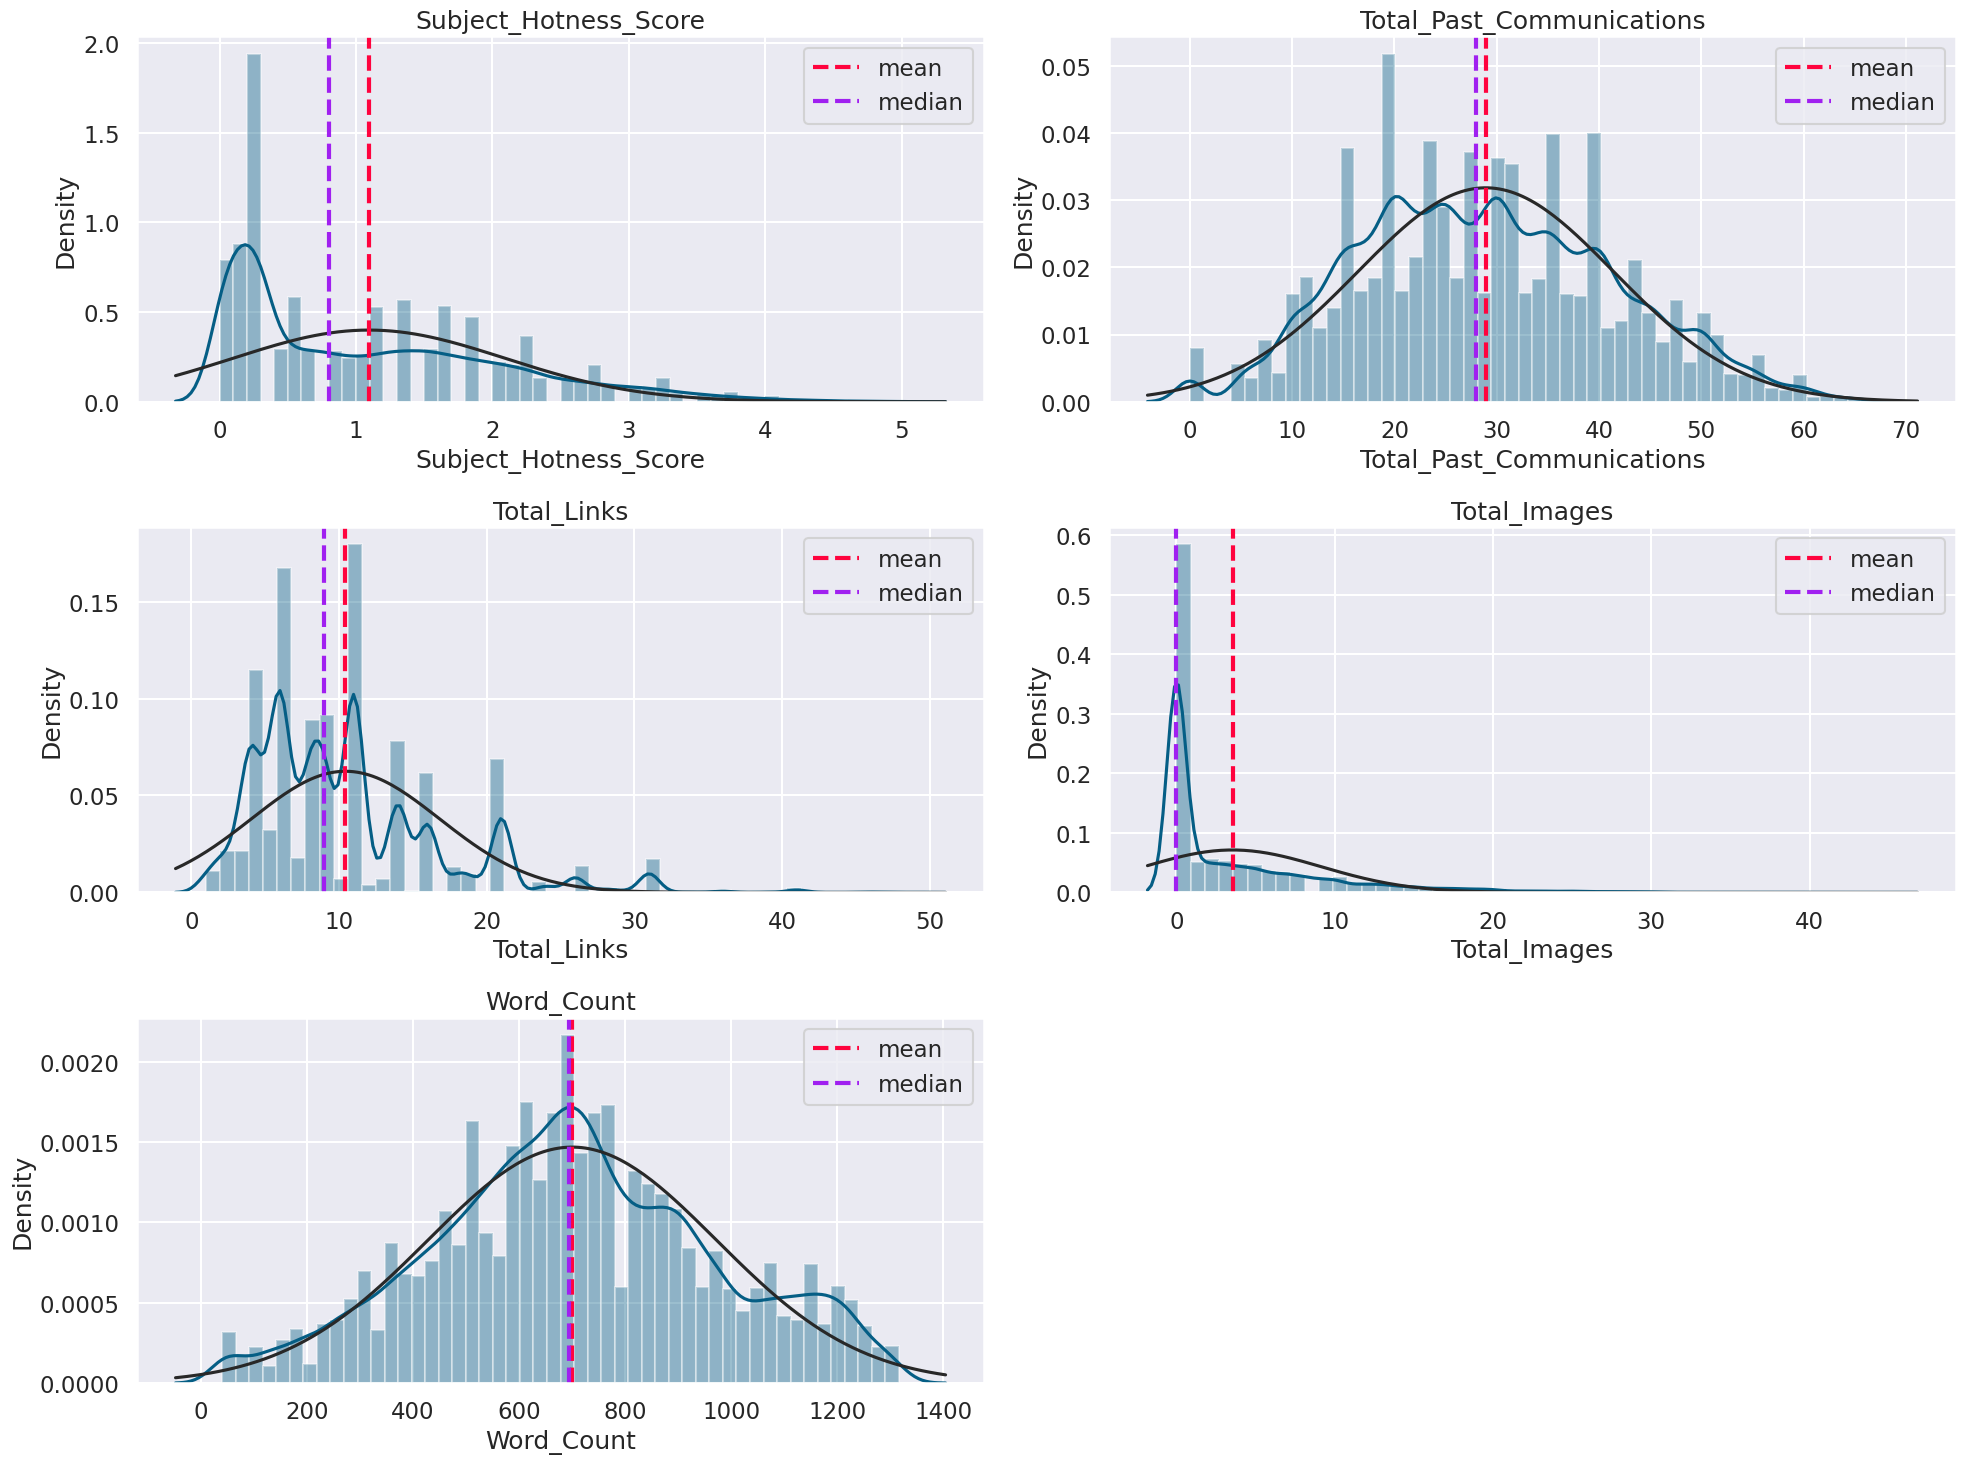

In [ ]:
# Chart - 1 numerical feature visualization code
graph = plt.figure(figsize = (20,29))
for i,col in enumerate(nume_fe) :
    sns.set_style("darkgrid")
    sns.set_context("talk");
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color = '#055E85', fit = norm);
    feature = df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

> A distplot is the most effective method for analyzing the distribution of any variable, especially a continuous one.The function seaborn.distplot() accepts a data variable as an input and produces a plot showing the density distribution.I thus used it.The graph depicted above is a combination of histogram and KDE plots, which is the most suitable method for plotting continuous variables and understanding their distribution.


##### 2. What is/are the insight(s) found from the chart?

From the above chart i found following insights

| Subject                 | Distribution    |
|-------------------------|-----------------|
| Word Count              |  Normal Distribution |
| Total Past Communication| Normal Distribution  |
| Hotness Score           | Positively Skewed Distribution |
| Total Image Count       | Positively Skewed Distribution |
| Total Links Count       | Positively Skewed Distribution |

---------------------------------------------------------------


1. The average subject hotness score is 1.
2. The average total past communication value is 30.
3. The average score for total links is 10.
4. The average value of the Total image is 3.
5. The average word count is 700.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> The purpose of this plot is to gain an understanding of the distribution of every variable, which will eventually aid in building models and managing null values or outliers. Understanding the importance of each value in creating an effective email campaign is crucial. However, this plot alone is not sufficient to predict negative growth.

#### Chart - 2   Enagement Based on Email Type

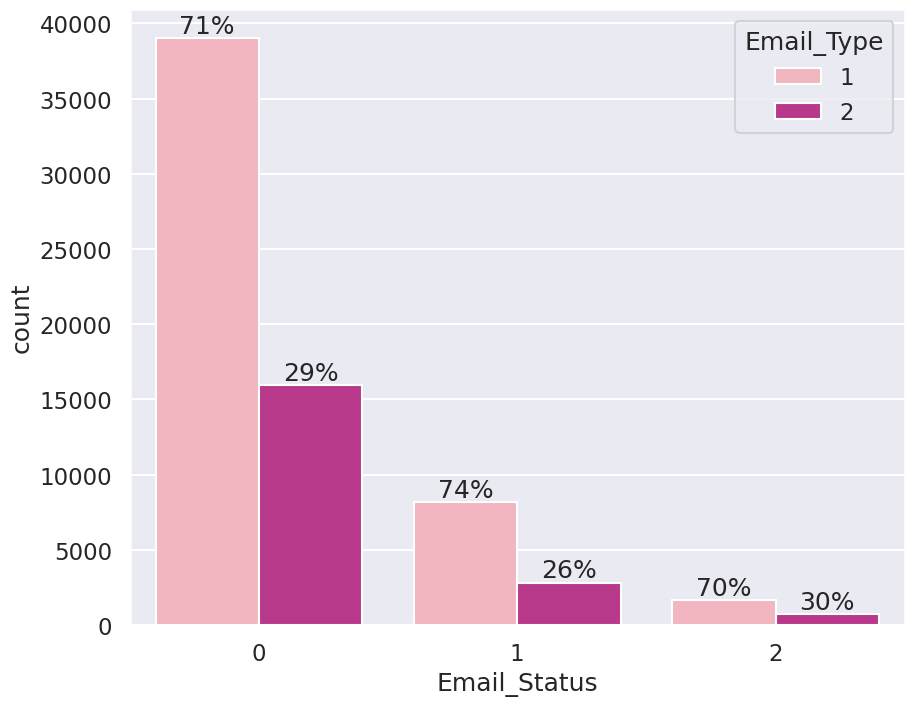

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = (10,8))
ax = sns.countplot(x=df['Email_Status'], hue=df['Email_Type'],palette='RdPu')
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

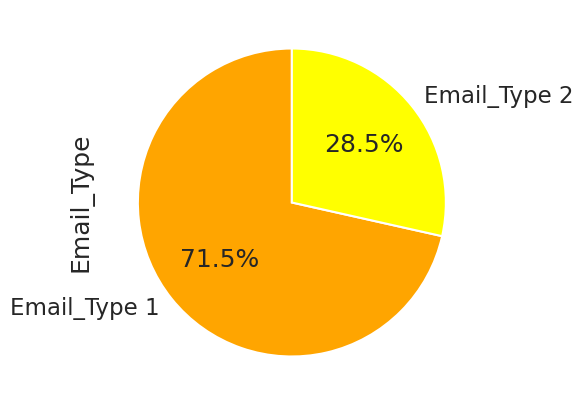

In [ ]:
#Pie chart displaying the distribution of every kind of email
df['Email_Type'].value_counts().plot(kind='pie',figsize=(15,5),
                               autopct="%1.1f%%",startangle=90,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['orange','yellow'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

> The count plot facilitates the understanding of the count of individual categories.
> Pie charts make it simple to determine the most important components by letting me compare each category's size to the total dataset.


##### 2. What is/are the insight(s) found from the chart?

> overall the number of emails that are ignored is significantly greater than the number of emails that are acknowledged as a whole.
> Out of the total, 71% of emails are type 1, and 71% are ignored. Therefore, only 29% of type 1 emails were opened.Additionally, 29% of emails are of type 2, of which 29% are ignored, while 71% of type 2 emails had an open rate.

> Compared to type-1 emails, type-2 emails received higher recognition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot aids in understanding email engagement, but it failed to produce any business impact beyond visualizing the curiosity of engagment.

#### Chart - 3  Engagement with all numerical features based on email type

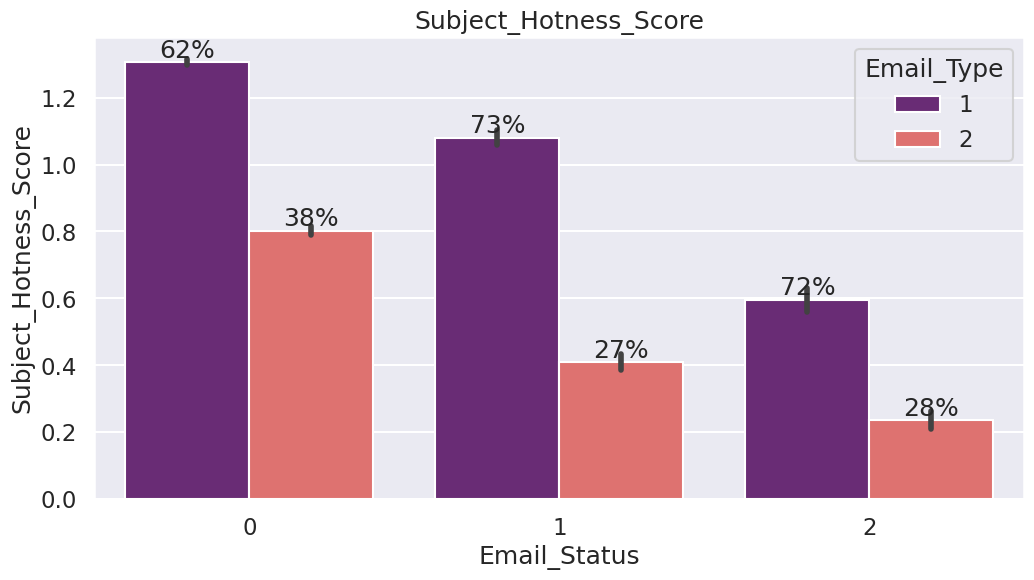

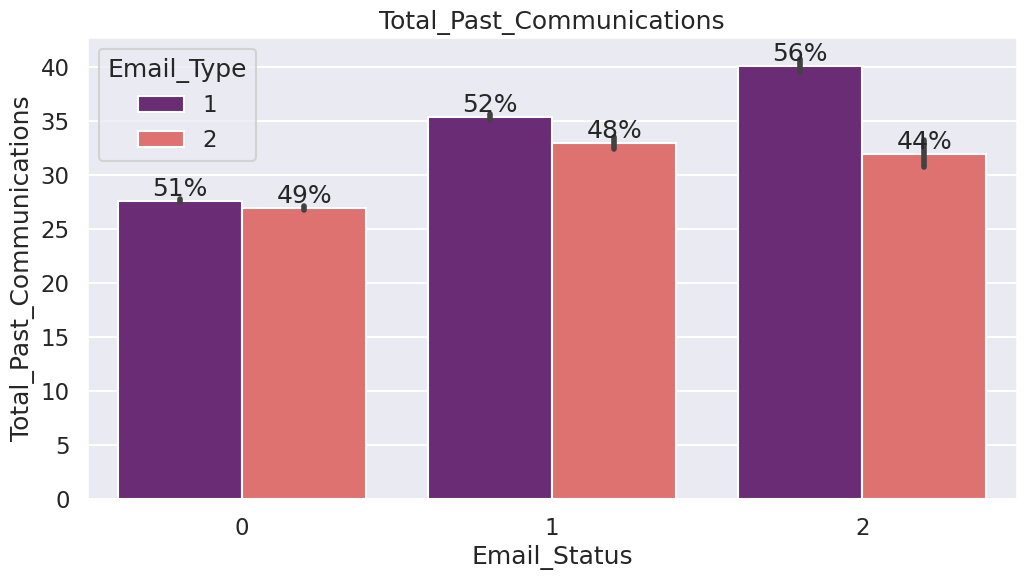

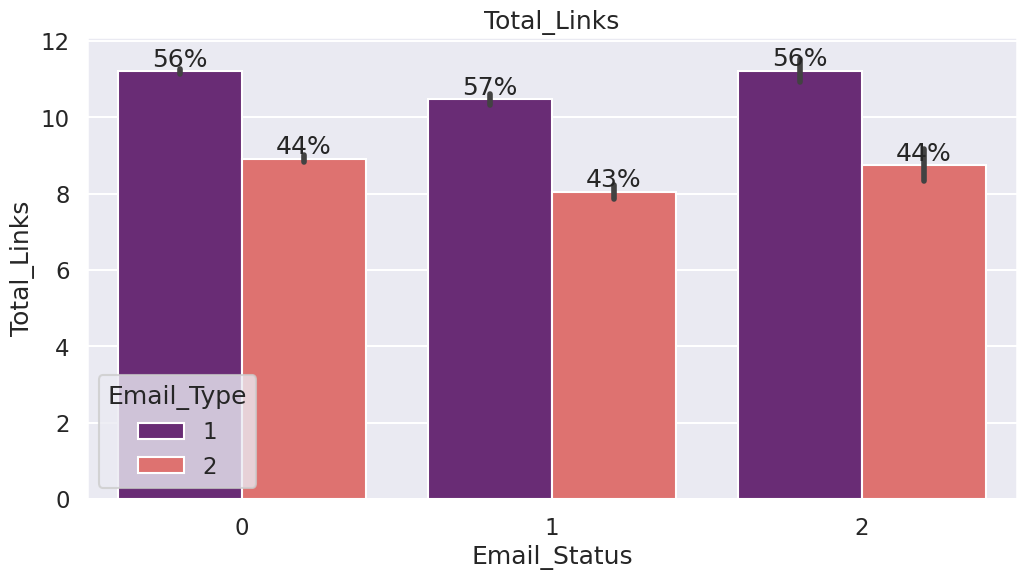

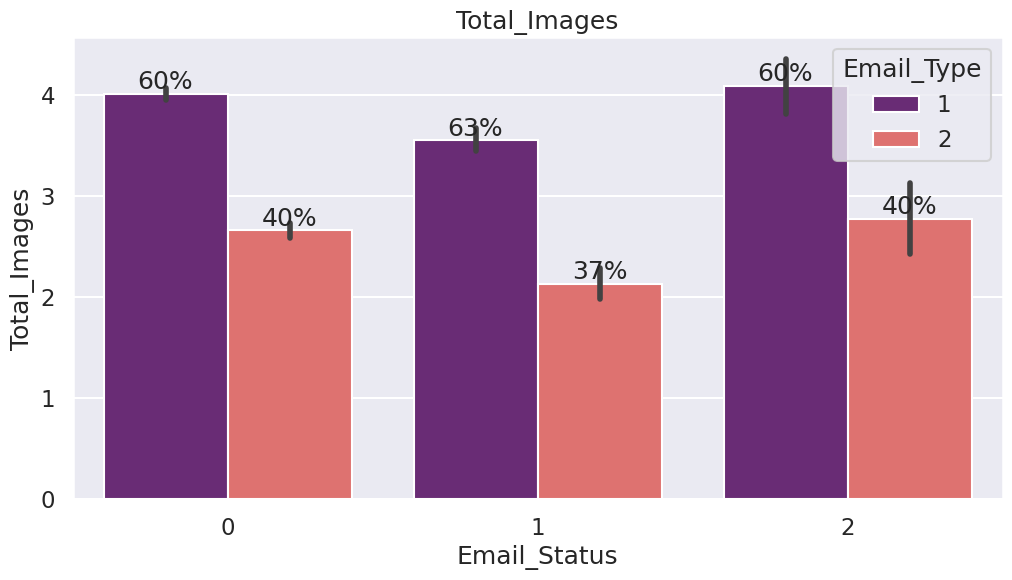

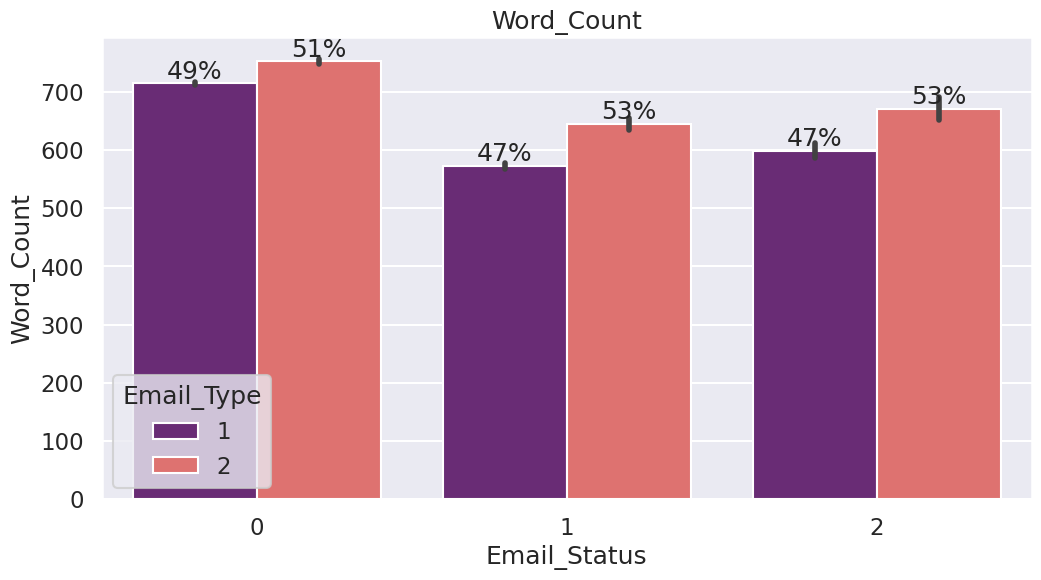

In [ ]:
# Chart - 3 visualization code

for value in nume_fe:
  plt.figure(figsize = (12,6))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Email_Type',palette= "magma");
  unique = len([x for x in df['Email_Status'].unique()])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

> Understanding both discrete and continuous data is aided by barplots. The frequency counts of values for each level of a nominal or categorical variable are displayed in bar charts. Bar charts can occasionally display other statistics, such percentages.

> I've created a bar chart to display the typical percentage of email type compared to email status.


##### 2. What is/are the insight(s) found from the chart?

> The preceding graph shows that type 2 emails had greater engagement rates than type 1 emails, despite type 1 emails being sent more frequently and having a higher rate of being ignored.
> This graph shows that in order to get better engagement, previous communication must have been more frequent. An average word length of 600 with a subject hotness score of 0.6 and material with an average of 10 links and 3 images yields positive results.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Sending emails should be a place where recipients can respond, rather than merely sending them from a no-reply email address. Additionally, sending emails in the format of notices demonstrates greater engagement. Marketing emails are typically ignored more than essential notices, and communication is vital.
.Negative growth may be caused by a low click-through rate or conversion rate for marketing emails If email marketing is the foundation of a business's scaling or revenue generation.

#### Chart - 4  Email Campaign Type

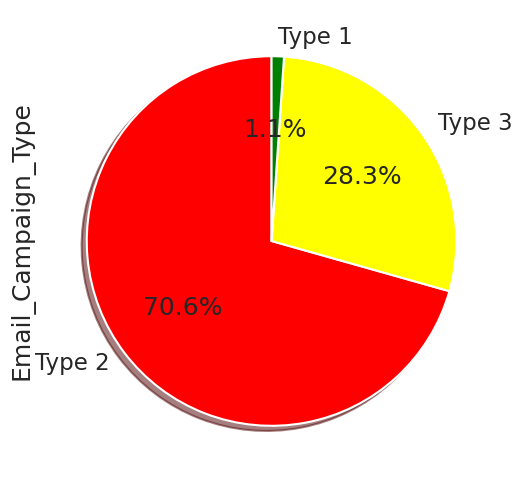

In [ ]:
# Chart - 4 visualization code
#pie chart for distribution of each email campaign type
df['Email_Campaign_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Type 2','Type 3', 'Type 1'],
                               colors=['red','yellow','green'],
                               explode=[0,0,0]
                                              );

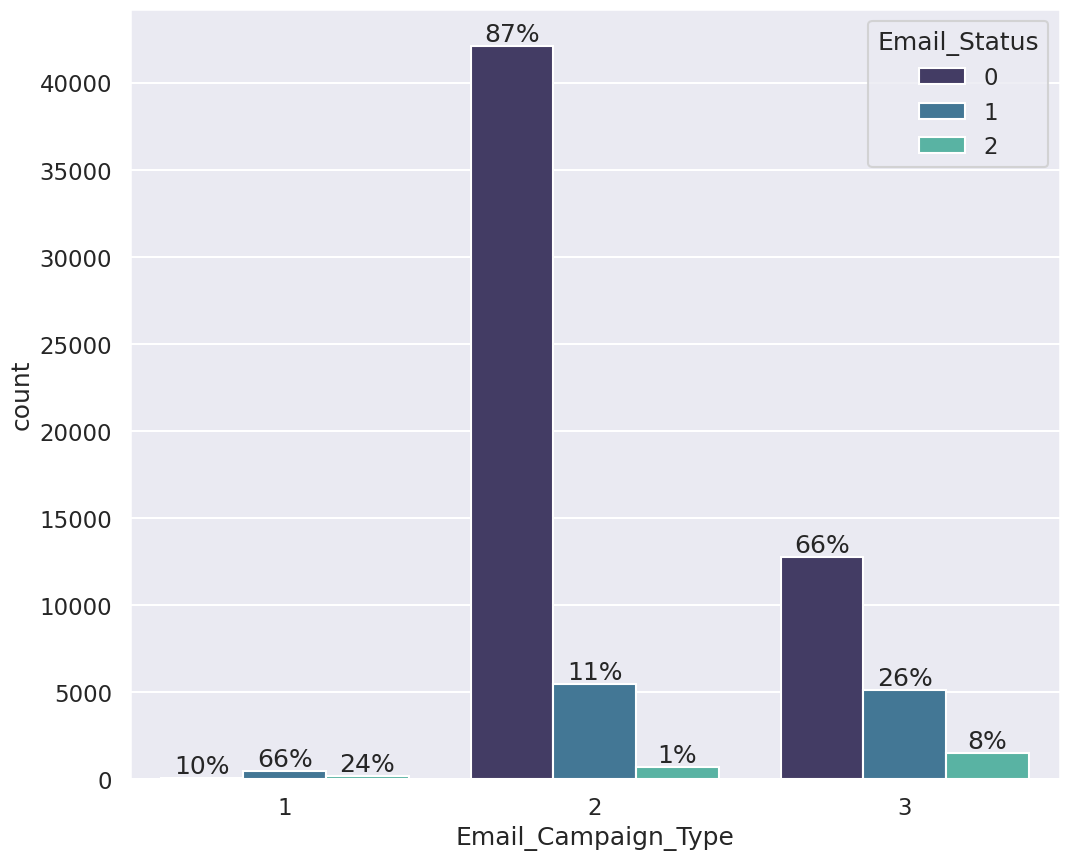

In [ ]:
#bar plot for understanding how email status is affected by campign type
plt.figure(figsize = (12,10))
ax = sns.countplot(x=df['Email_Campaign_Type'], hue=df['Email_Status'],palette='mako')
unique = len([x for x in df['Email_Campaign_Type'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

> Understanding both discrete and continuous data is aided by barplots. The frequency counts of values for each level of a nominal or categorical variable are displayed in bar charts. Bar charts can occasionally display other statistics, such percentages.

>I've created a bar chart to display the average percentage of email campaign types according to email status.

>A pie chart displays the percentage of each category.


##### 2. What is/are the insight(s) found from the chart?

> Although Email campaign 1 has a small number of emails, the open rate for those emails is much higher than the rest.
>Email campaign type 2 shows that most of the emails are ignored and only 1% of them are acknowledged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> The company should discontinue campaign 2 because the majority of the emails are being ignored and increase campaign type 1 since it shows more engagement.

>Sending bulk emails will only result in a loss of money, thus it is best to discontinue that category and do an A/B test with the content and other categories first. If emails are ignored in large quantities.


#### Chart - 5  Location with the most email acknowledgements

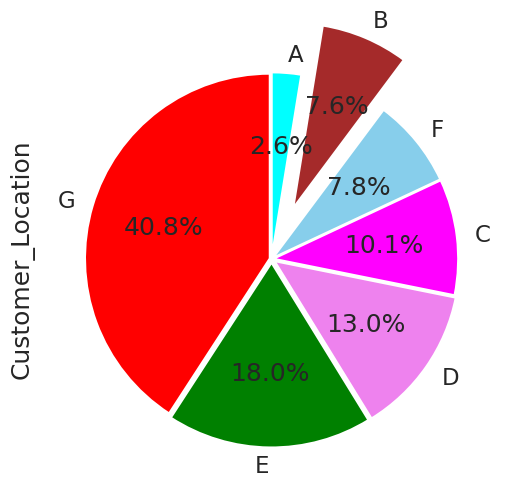

In [ ]:
# Chart - 5 visualization code
#pie chart for distribution of each email campaign type
df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),autopct="%1.1f%%",
                               startangle=90,labels=['G','E', 'D','C','F','B','A'],
                               colors=['red','green','violet','magenta','skyblue','brown','cyan','orange'],
                               explode=[0.01,0.02,0.02,0.01,0.01,0.3,0.01]
                              );

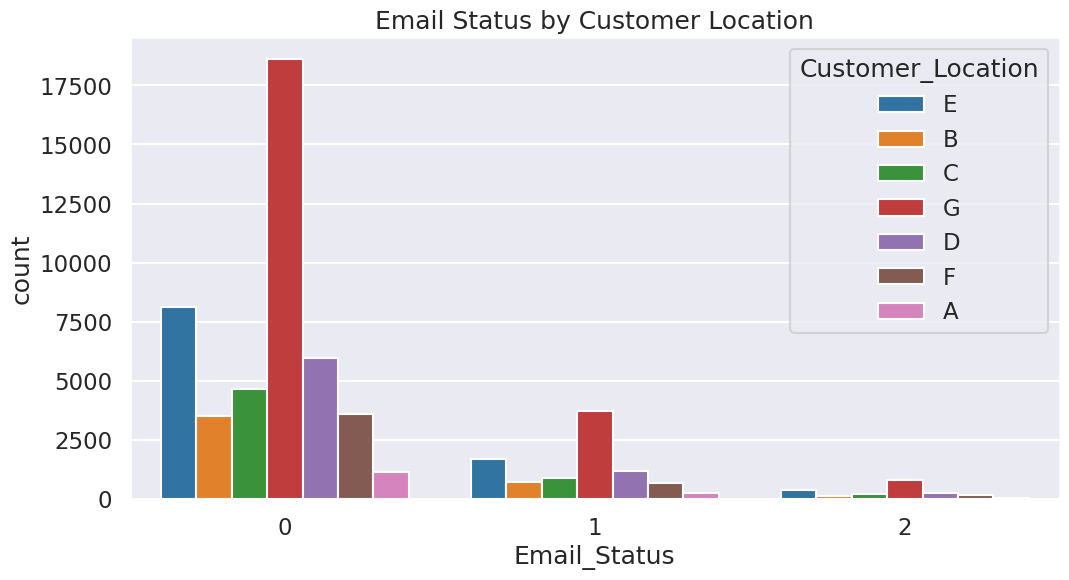

In [ ]:
#based on location identifying how email status changed
plt.figure(figsize = (12,6))
sns.countplot(x=df['Email_Status'], hue=df['Customer_Location'])
plt.title('Email Status by Customer Location')
plt.show()

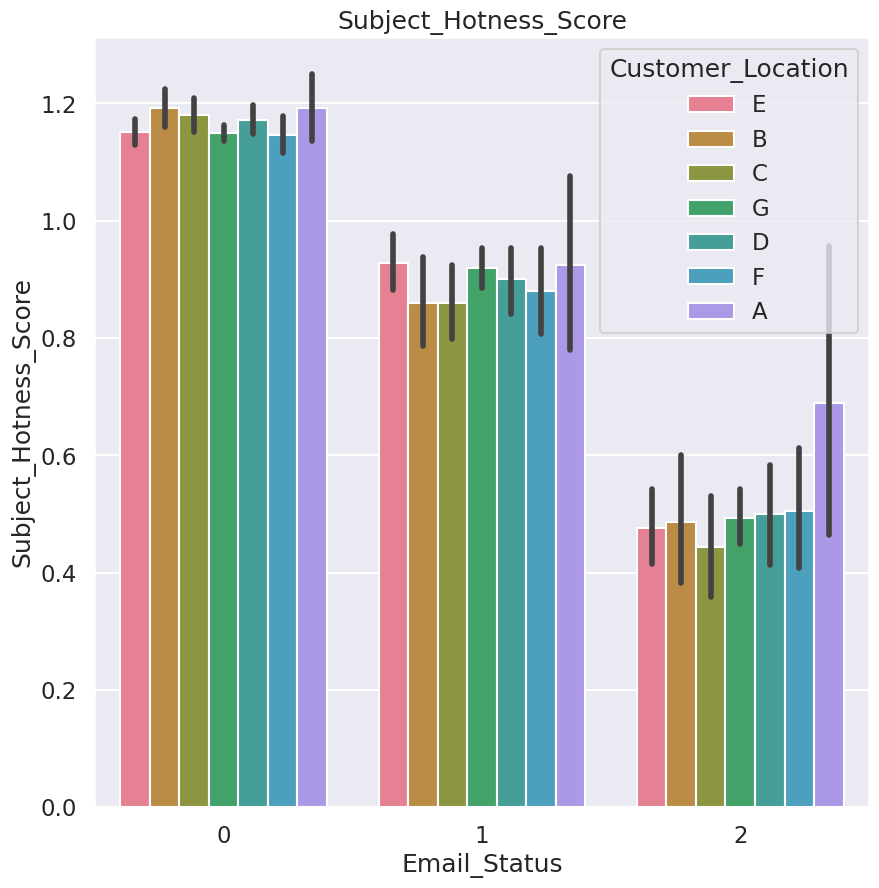

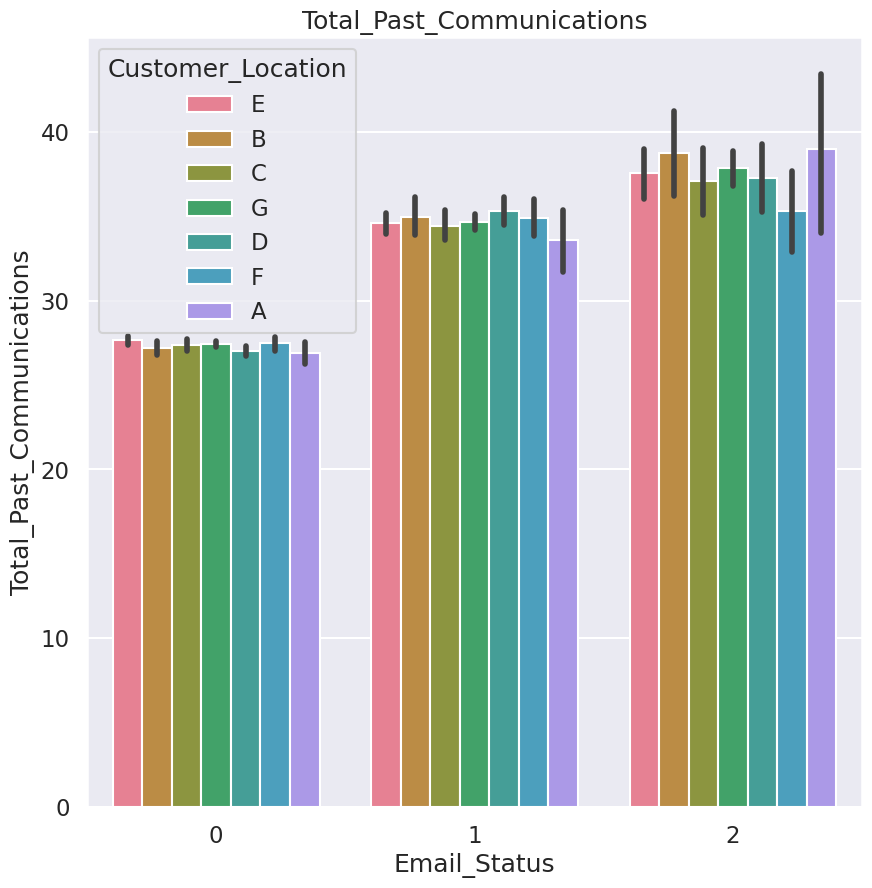

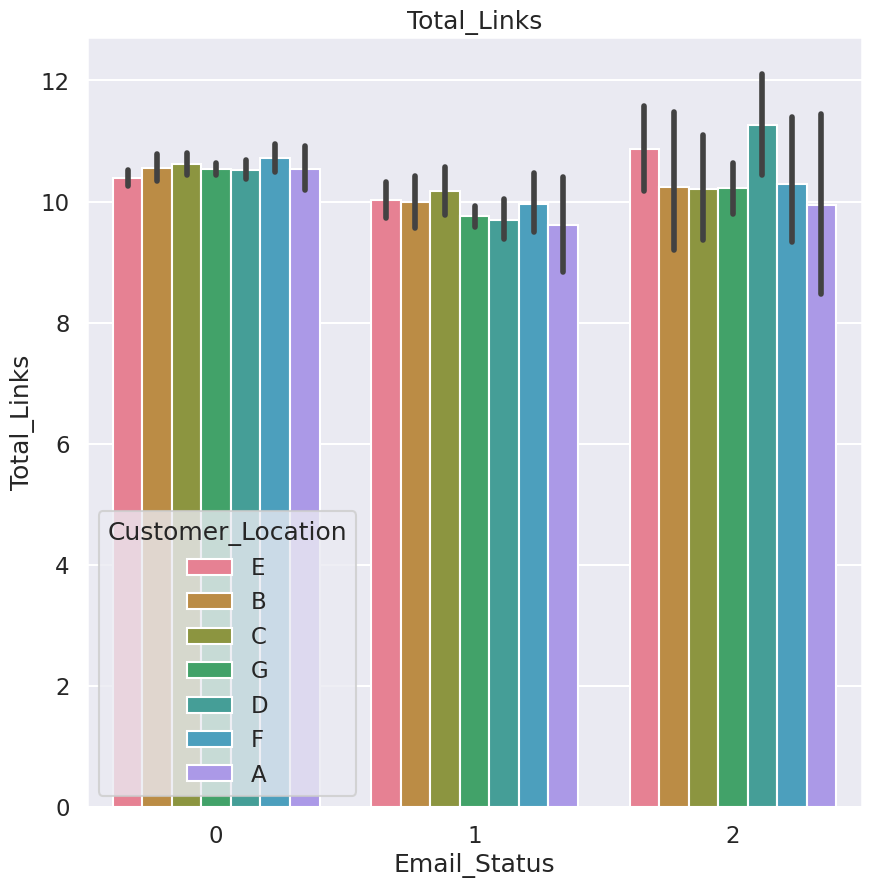

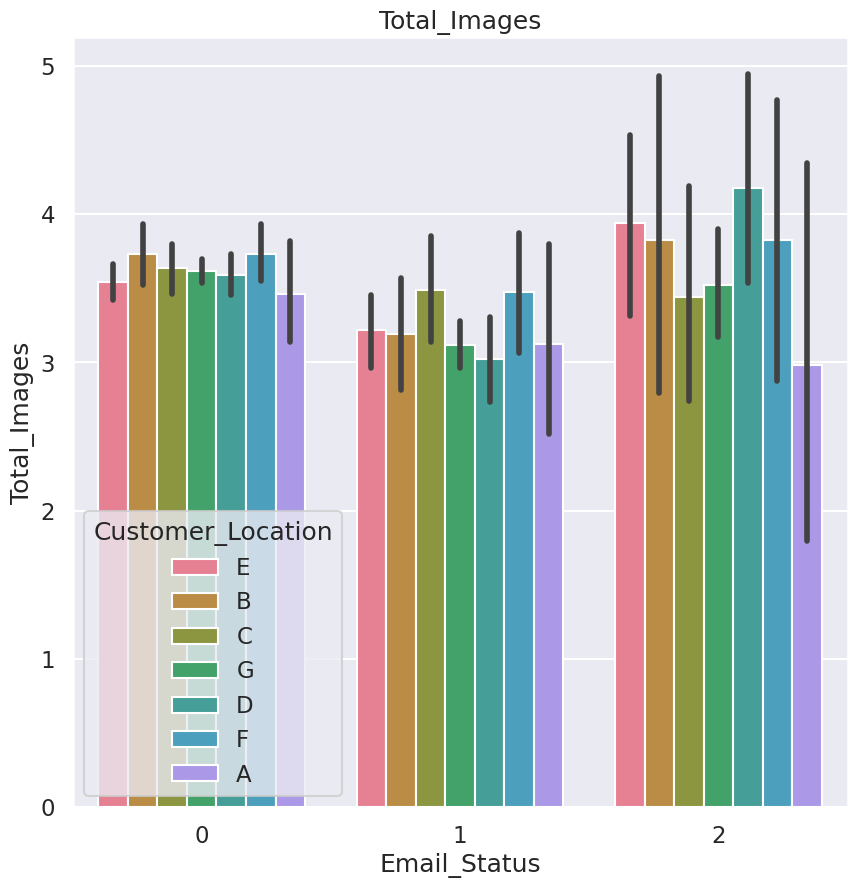

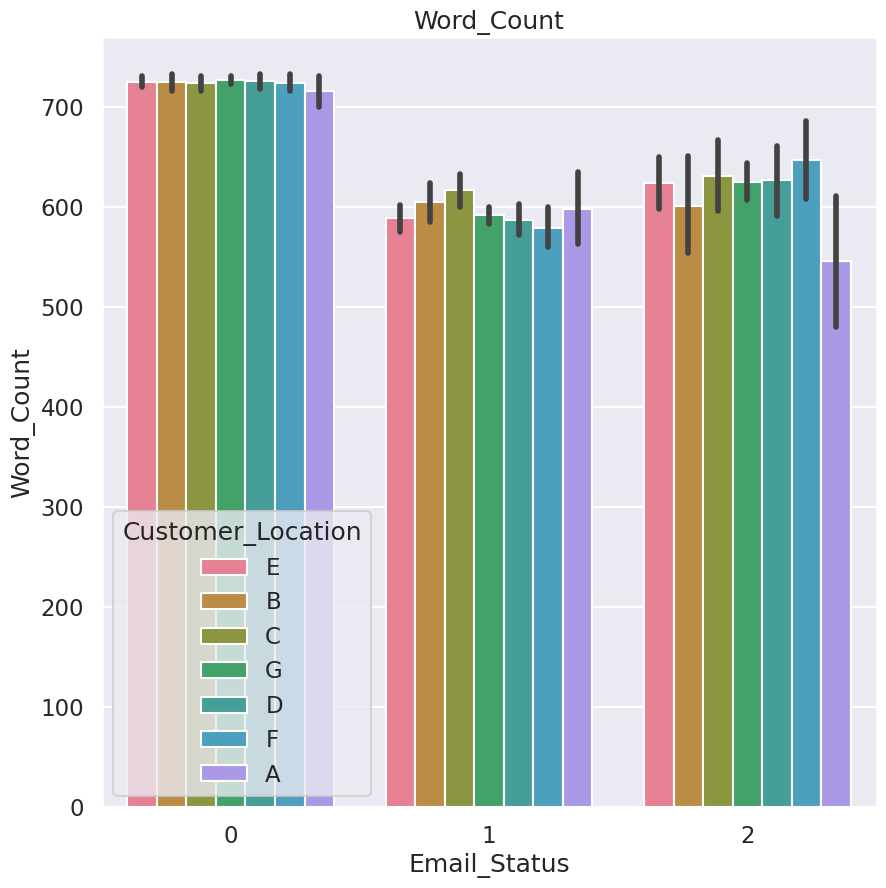

In [ ]:
#checking effect of location on other numerical features
for value in nume_fe:
  plt.figure(figsize = (10,10))
  palette = sns.color_palette("husl", len(df['Customer_Location'].unique()))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Customer_Location', palette=palette);
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

> Pie charts make it simple to determine the most important components by letting me compare each category's size to the total dataset.

>The count plot facilitates the understanding of the count of individual categories.

>With each bar representing a category or group, bar plots are an excellent way to visualize categorical data. Because of this, they can be used to display information about product categories, nations, or age groups.

##### 2. What is/are the insight(s) found from the chart?

>Location C has the highest amount of engagement despite the fact that relatively few emails are sent to this location; additionally, it displays the highest number of communication and emails acknowledged.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason..

>Since most emails at site G are rejected and just a small percentage are acknowledged, more emails should be sent to location C than to location G.
It's possible that customer location G had more potential, but the lower conversion rate could result in additional revenue loss.

#### Chart - 6  analysis of time when email was sent

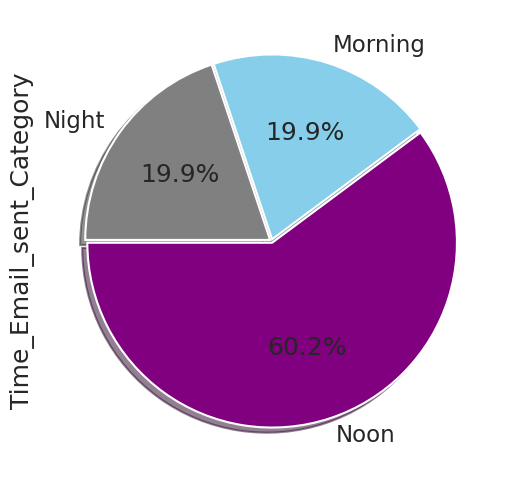

In [ ]:
# Chart - 6 visualization code
#pie graph showing the distribution of emails by time period
df['Time_Email_sent_Category'].value_counts().plot(kind='pie',
                              figsize=(16,6),autopct="%1.1f%%",
                               startangle=180,shadow=True,
                               labels=['Noon','Morning', 'Night'],
                               colors=['purple','skyblue','grey'],
                               explode=[0.01,0.01,0.01]
                              );

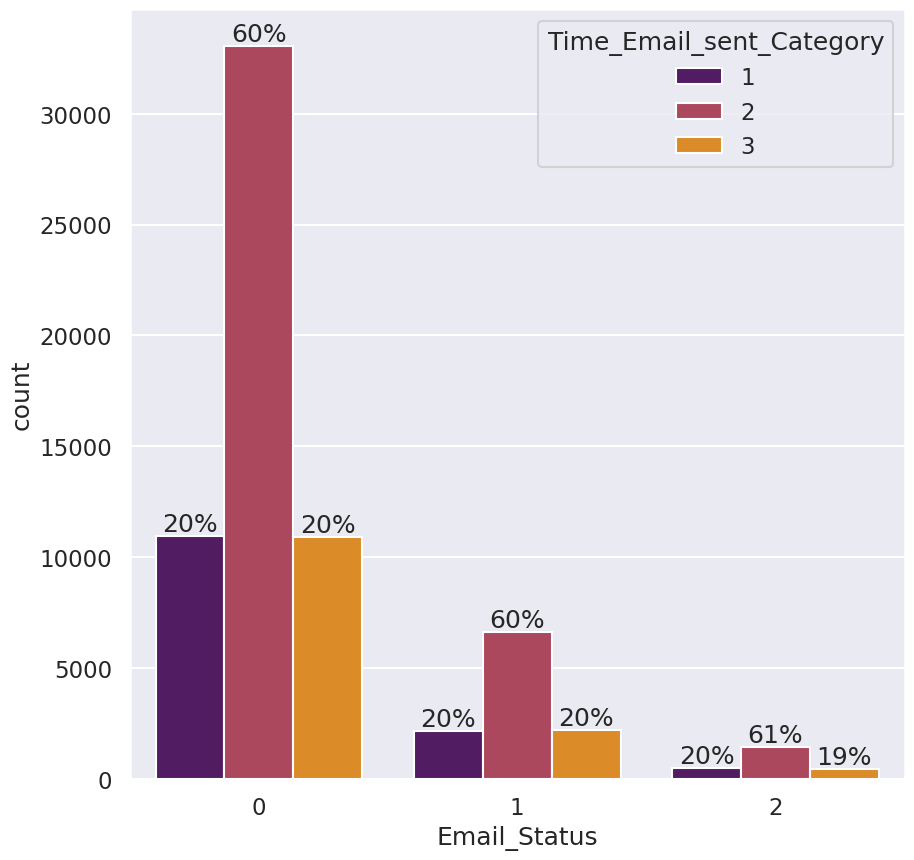

In [ ]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'], palette='inferno')
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
  catbars=bars[i:][::unique]
  #get height
  total = sum([x.get_height() for x in catbars])
  #print percentage
  for bar in catbars:
    ax.text(bar.get_x()+bar.get_width()/2.,
            bar.get_height(),
            f'{bar.get_height()/total:.0%}',
            ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

> The distribution can be learned using a pie chart, while a count plot can help understand the effect of time period on email treatment.

##### 2. What is/are the insight(s) found from the chart?

> During the afternoon, 60% of the emails were sent, but 60% of them were ignored. Only 60% of the remaining 40% displayed an open rate.Since the percentage of emails sent in the morning and at night is the same, emails sent overall at these times are recognized more.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> In email marketing, timing is everything.It's crucial to send emails at the right time. People typically plan their day in the morning or for tomorrow at night, therefore, these times show more acknowledged emails.
Delivering emails at the precise moment when recipients would like to view the advertisement or content will increase impressions and boost conversion rates.
Emails sent in the afternoon were the most likely to be ignored, which can be expensive because there aren't many emails acknowledged at this time.



#### Chart - 7  Total Past Communication

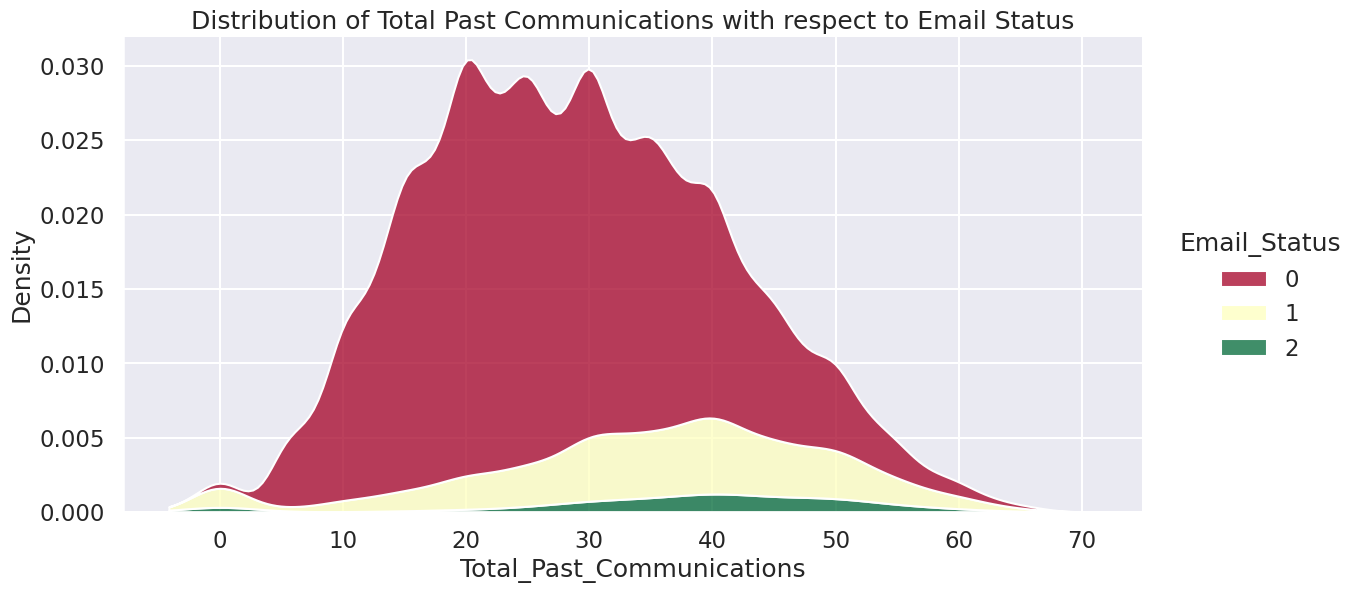

In [ ]:
# Chart - 7 visualization code
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = df,
            kind = 'kde', height=6, aspect=2, multiple='stack', palette='RdYlGn');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()

##### 1. Why did you pick the specific chart?

> A stacked chart facilitates the comparison of several features' probability density curves.


##### 2. What is/are the insight(s) found from the chart?

> It is evident from the density that a higher number of ignored emails indicates fewer communications than acknowledged emails.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Having a conversation with customers is very important, rather than just sending marketing emails.This density plot is limited in its ability to impact business because it only displays the distribution.

#### Chart - 8  Correlation Heatmap

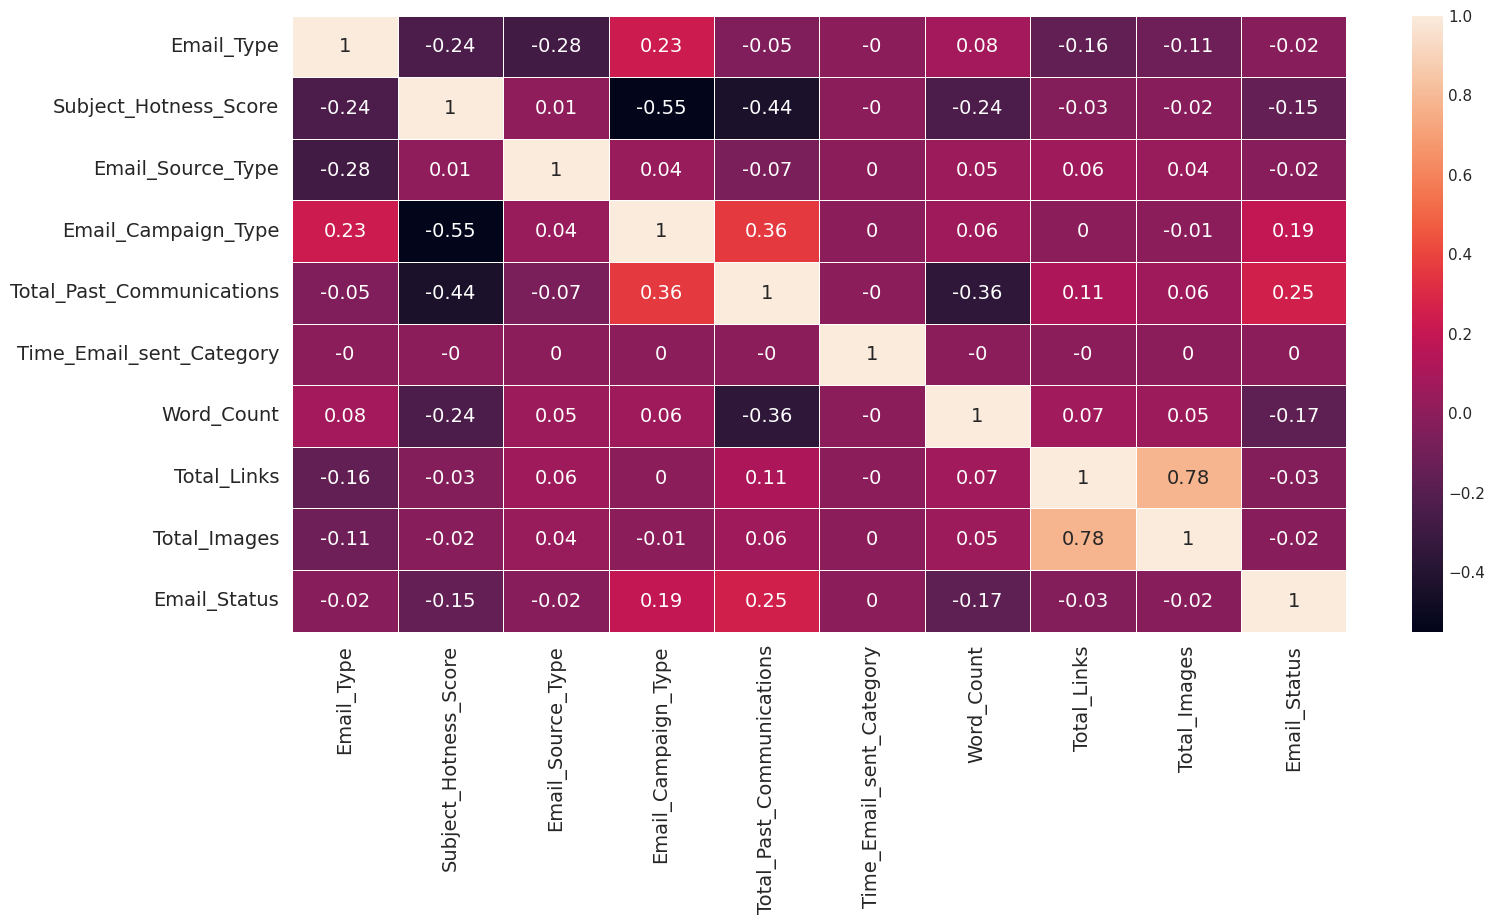

In [ ]:
# Chart - 8 visualization code
# Correlation Heatmap visualization code
sns.set_context('notebook')
plt.figure(figsize = (17,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.style.use("fivethirtyeight")
sns.heatmap(df.corr().round(2), annot=True,linewidth=.5)
plt.show()

##### 1. Why did you pick the specific chart?

> Heatmaps can be used to analyze correlation.Heatmaps are used to demonstrate relationships between two variables by drawing one variable on each axis.A correlation heatmap is a tool that helps visualize the correlations between variables, supporting data summarization, advanced analysis input, and diagnostics. A correlation matrix is a table that shows correlation coefficients between variables, with values ranging from -1 to 1.
therefore I utilised them.

##### 2. What is/are the insight(s) found from the chart?

>The correlation between total links and images is 0.78, resulting in multicollinearity.

#### Chart - 9 Pair plot

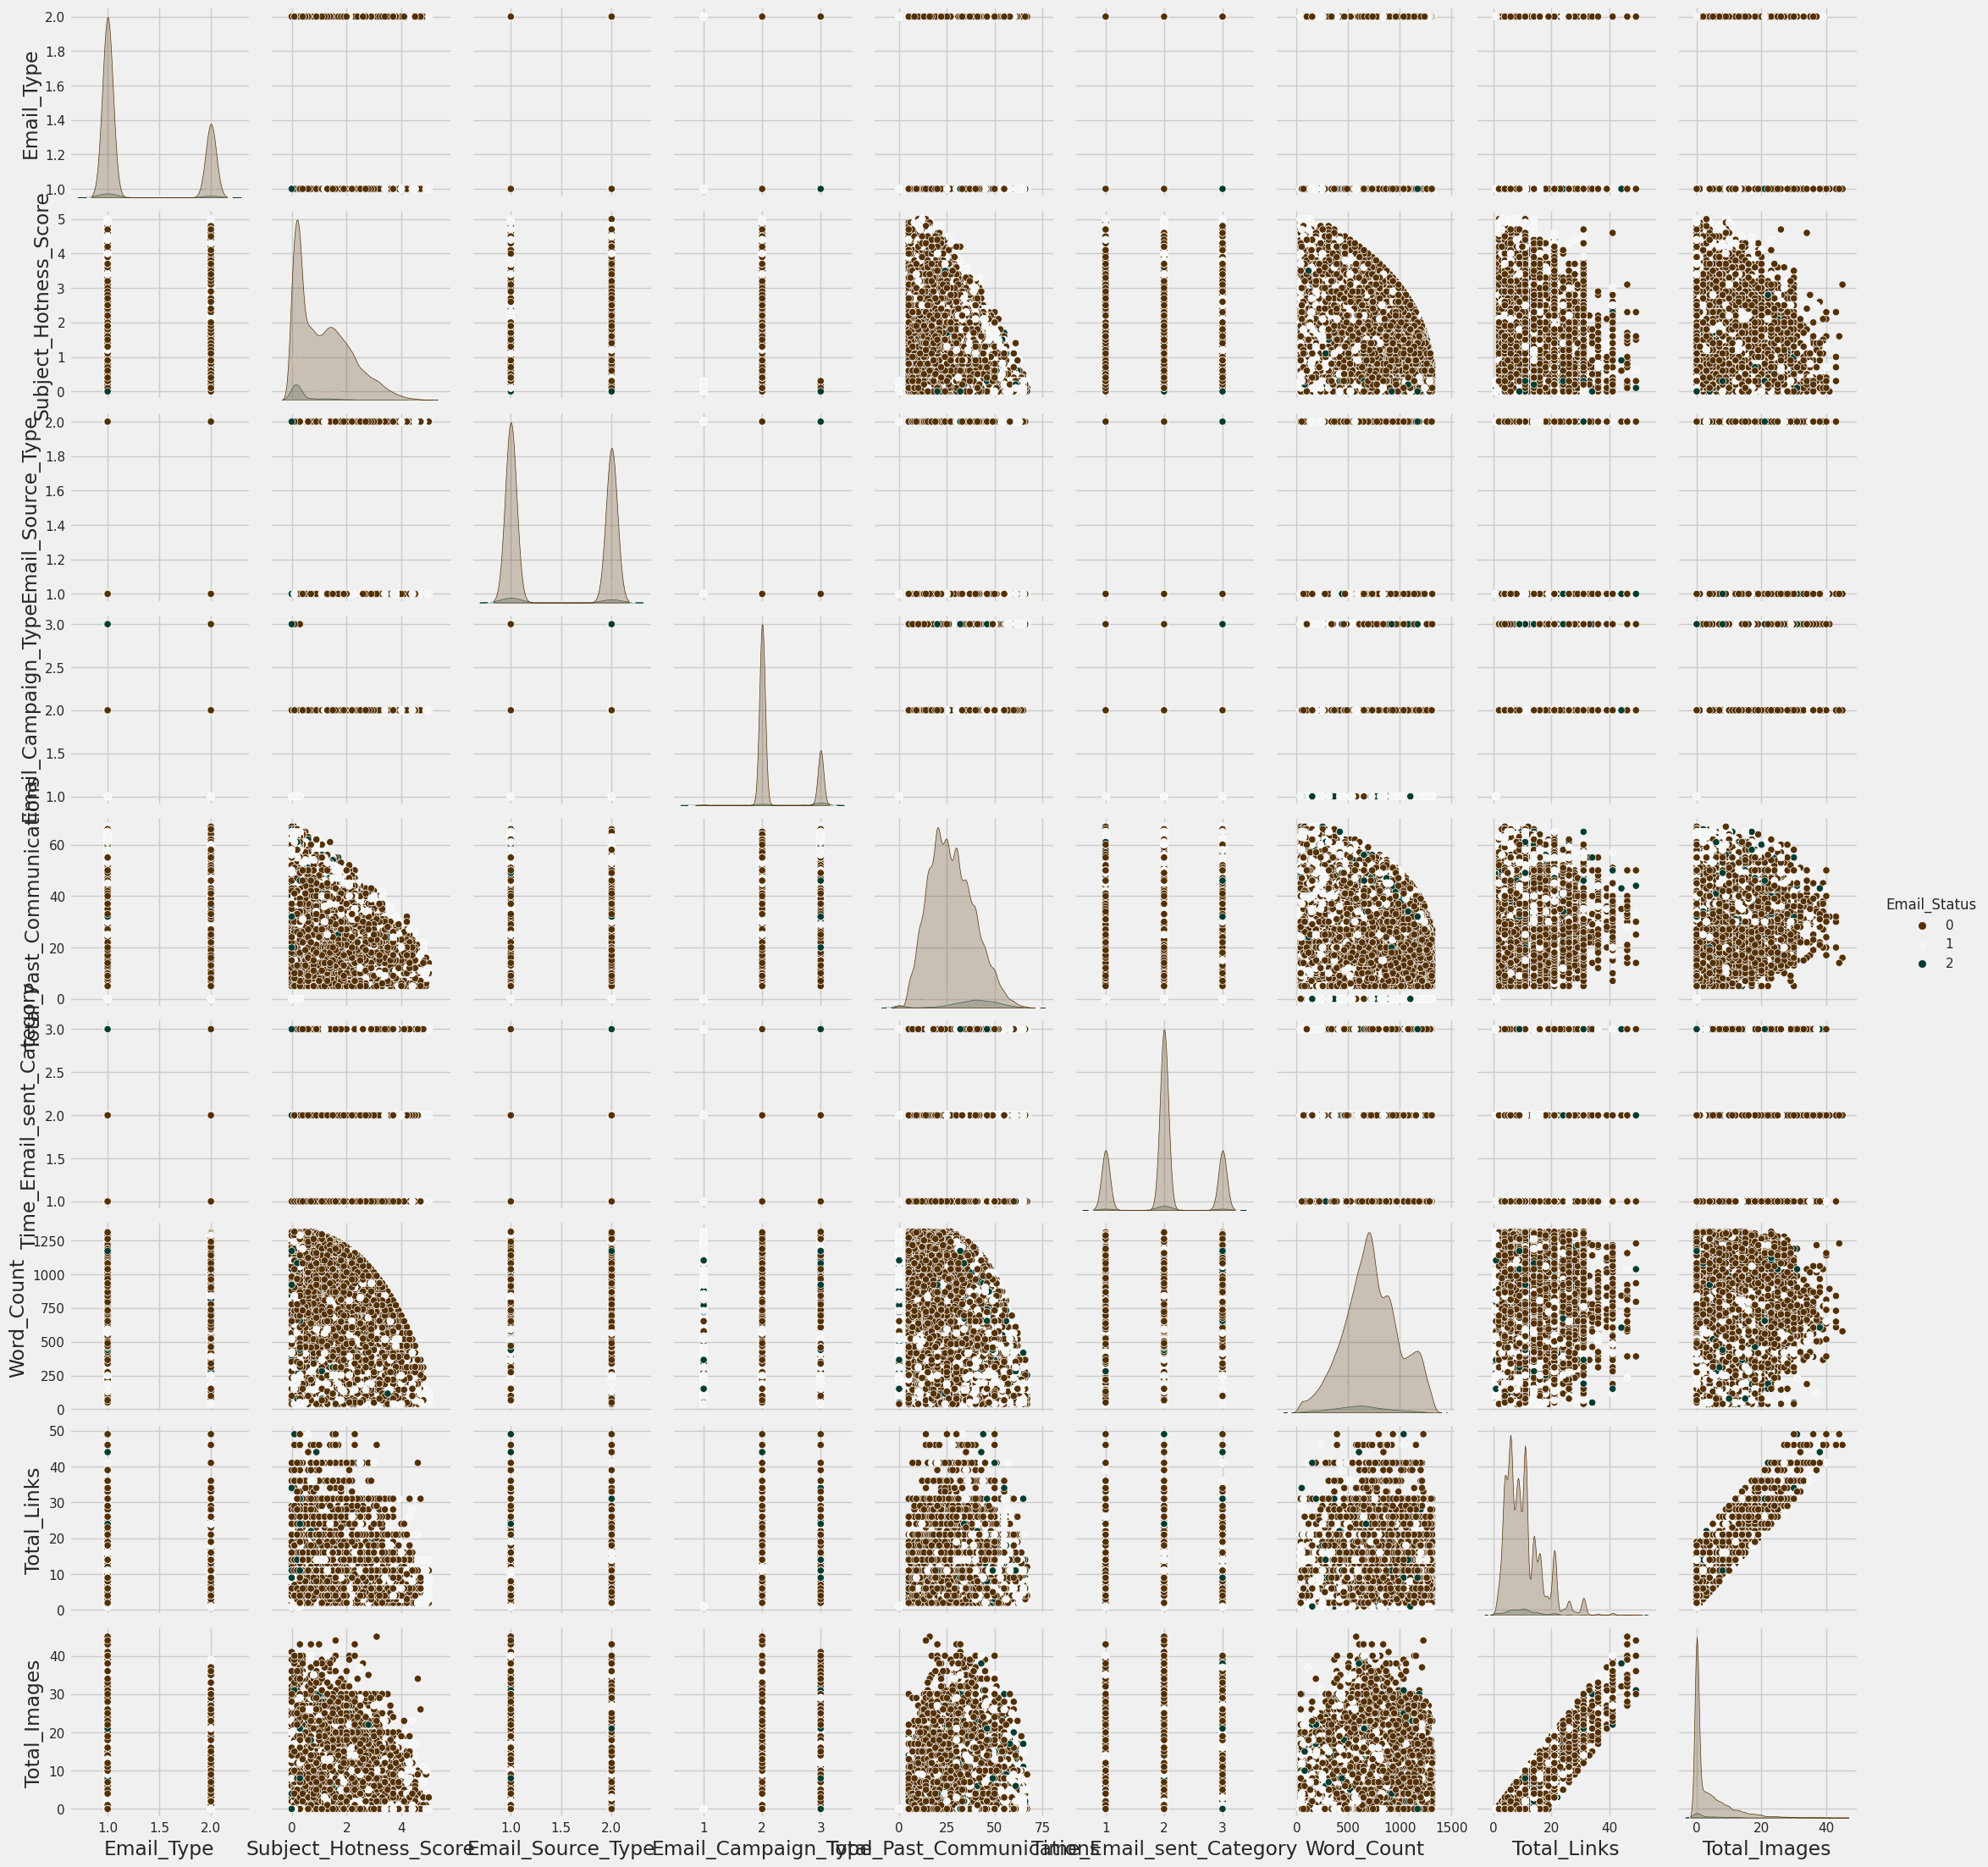

In [ ]:
# Chart - 9 visualization code
# Pair Plot visualization code
sns.pairplot(df, hue="Email_Status",palette= "BrBG");

##### 1. Why did you pick the specific chart?

> Understanding how the different pairs of variables vary and how they are distributed can be achieved through the pair chart.
In order to analyze the data patterns and the relationships between the features, I employed pair plotting. It is precisely the same as the correlation map, except the graphical depiction is provided here.

##### 2. What is/are the insight(s) found from the chart?

>I learned from the preceding chart that there are less linear relationships between variables and that there is not much of a relationship because the majority of the data were categorical, with only one or two categories.
The correlation between total links and images is evident, as evidenced by the earlier heat map.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

> The email_type of the campaign won't make a significant difference in the Email_Status of the campaign.

>The Subject Hotness Score of the email won't have any significant effect on the Total Past Communications.

>The Total_Links and Total_Images in the email will not be significantly affected by the Customer_Location.

### Hypothetical Statement - 1

The email_type of the campaign won't make a significant difference in the Email_Status of the campaign.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform chi-square test of independence
contingency_table = pd.crosstab(df['Email_Type'], df['Email_Status'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("The Email_Type has significant effects on the Email_Status, thus reject the null hypothesis.")
else:
    print("The Email_Type has no significant impact on the Email_Status, thus fail to reject the null hypothesis.")

The Email_Type has significant effects on the Email_Status, thus reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

>I used the chi-square test of independence, a statistical test, to investigate this hypothesis and see if there was a significant relationship between the two categorical variables. Email_Type and Email_Status are the two variables in this instance.


##### Why did you choose the specific statistical test?

>The reason for this test is that the variables are categorical and I need to determine if there are any correlations between them.

### Hypothetical Statement - 2

The Subject Hotness Score of the email won't have any significant effect on the Total Past Communications.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

>* Null Hypothesis: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)
* Alternative Hypothesis: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)
* Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [ ]:
# The variable I used for performing the test has null or infinity values, so I created a copy and treated those
dt = df.copy()
dt = dt.replace([np.inf, -np.inf], np.nan)
dt = dt.fillna(dt.mean())

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform correlation test
r, p_value = stats.pearsonr(dt['Subject_Hotness_Score'], dt['Total_Past_Communications'])

if p_value < 0.05:
    print("The Subject_Hotness_Score has a significant impact on the Total_Past_Communications, thus reject the null hypothesis.")
else:
    print("The Subject_Hotness_Score has no significant impact on the Total_Past_Communications, thus fail to reject the null hypothesis.")

The Subject_Hotness_Score has a significant impact on the Total_Past_Communications, thus reject the null hypothesis.


In [ ]:
# Perform non-parametric Spearman's rank correlation test
rho, p_value = stats.spearmanr(dt['Subject_Hotness_Score'], dt['Total_Past_Communications'])

if p_value < 0.05:
    print("The Subject_Hotness_Score has a significant impact on the Total_Past_Communications, thus reject the null hypothesis.")
else:
    print("The Subject_Hotness_Score has no significant impact on the Total_Past_Communications, thus Fail to reject the null hypothesis.")

The Subject_Hotness_Score has a significant impact on the Total_Past_Communications, thus reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

>I utilized Pearson's correlation test, which calculates the linear relationship between two continuous data, to test this hypothesis. The two variables in this instance are Total_Past_Communications and Subject_Hotness_Score.


##### Why did you choose the specific statistical test?

>I use this test because the variables are continuous and I want to see if they have a linear relationship.

### Hypothetical Statement - 3

The Total_Links and Total_Images in the email will not be significantly affected by the Customer_Location.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Links'],
                                  df[df['Customer_Location'] == 'B']['Total_Links'],
                                  df[df['Customer_Location'] == 'C']['Total_Links'],
                                  df[df['Customer_Location'] == 'D']['Total_Links'],
                                  df[df['Customer_Location'] == 'E']['Total_Links'],
                                  df[df['Customer_Location'] == 'F']['Total_Links'],
                                  df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis: the email's Total_Links are significantly impacted by the Customer_Location.")
else:
    print("Fail to Reject the null hypothesis: There is no significant impact of Customer_Location on Total_Links in the email.")


Fail to Reject the null hypothesis: There is no significant impact of Customer_Location on Total_Links in the email.


In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Images'],
                                  df[df['Customer_Location'] == 'B']['Total_Images'],
                                  df[df['Customer_Location'] == 'C']['Total_Images'],
                                  df[df['Customer_Location'] == 'D']['Total_Images'],
                                  df[df['Customer_Location'] == 'E']['Total_Images'],
                                  df[df['Customer_Location'] == 'F']['Total_Images'],
                                  df[df['Customer_Location'] == 'G']['Total_Images'])
if p_value < 0.05:
    print("Reject the null hypothesis: The Customer Location has a significant impact on the Total Images in the email, thus reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis: The email's Total_Images are not significantly impacted by the Customer_Location.")

Fail to reject the null hypothesis: The email's Total_Images are not significantly impacted by the Customer_Location.


In [ ]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(df[df['Customer_Location'] == 'A']['Total_Links'],
                              df[df['Customer_Location'] == 'B']['Total_Links'],
                              df[df['Customer_Location'] == 'C']['Total_Links'],
                              df[df['Customer_Location'] == 'D']['Total_Links'],
                              df[df['Customer_Location'] == 'E']['Total_Links'],
                              df[df['Customer_Location'] == 'F']['Total_Links'],
                              df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("reject the null hypothesis: The total links in the email are significantly influenced by the customer's location, so reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis: The Customer Location has no significant impact on the Total Links in the email so fail to reject the null hypothesis .")


Fail to reject the null hypothesis: The Customer Location has no significant impact on the Total Links in the email so fail to reject the null hypothesis .


##### Which statistical test have you done to obtain P-Value?

>I utilized the ANOVA (Analysis of Variance) test to test my hypothesis since this statistical test is intended to ascertain whether the means of two or more groups differ statistically significantly.


##### Why did you choose the specific statistical test?

> Based on the chart analysis, it can be concluded that there is minimal  linear relationship between the variables.The purpose of this test is to ascertain whether the means of two or more groups differ significantly from one another. In this instance, the locations are A, B, C, D, E, F, and G. Our goal is to ascertain whether the mean of Total_Links differs significantly between these groups. Since we wish to compare the means of several groups and the variable Total_Links is continuous, an ANOVA is the proper statistical method in this instance.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

* Visualizing the missing values

* Checking Null Value by plotting Heatmap

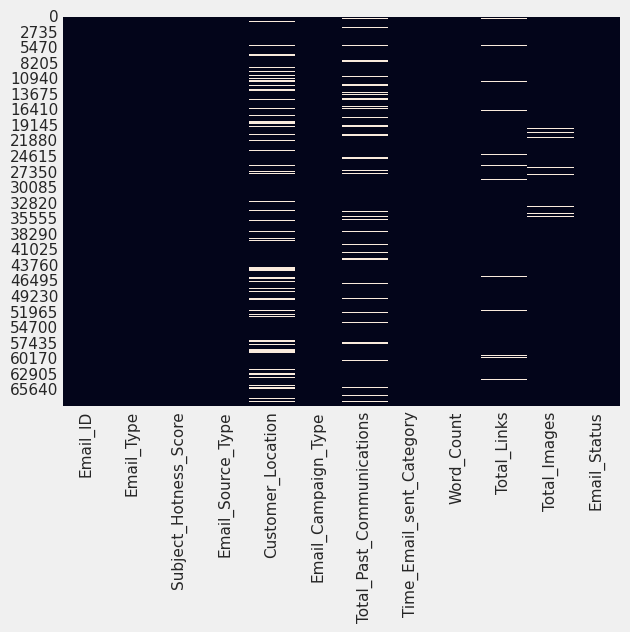

In [ ]:
# Handling Missing Values & Missing Value Imputation
sns.heatmap(df.isnull(), cbar=False);

In [ ]:
# Using the created function, obtaining the count of missing values.
def showMissing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = df[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = df[showMissing()].isnull().sum().sort_values(ascending = False)/len(df)*100

missingVal

Missing Data Count  Missing Data Percentage
Customer_Location                       11595                    16.96
Total_Past_Communications                6825                     9.98
Total_Links                              2201                     3.22
Total_Images                             1677                     2.45

In [ ]:
#replacing null value in customer location using mode
df['Customer_Location'].fillna(df['Customer_Location'].mode()[0], inplace = True)

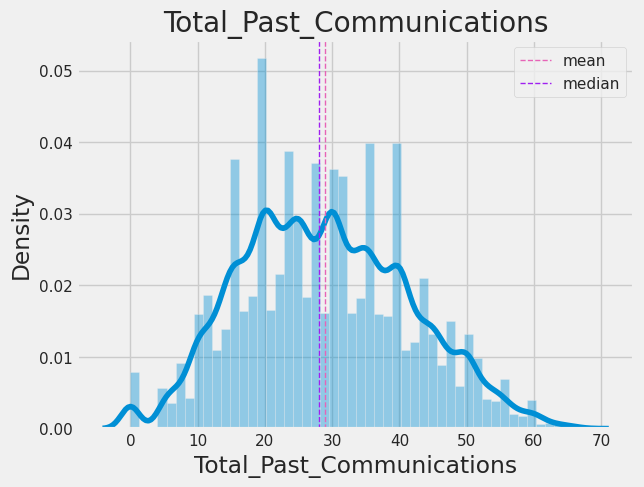

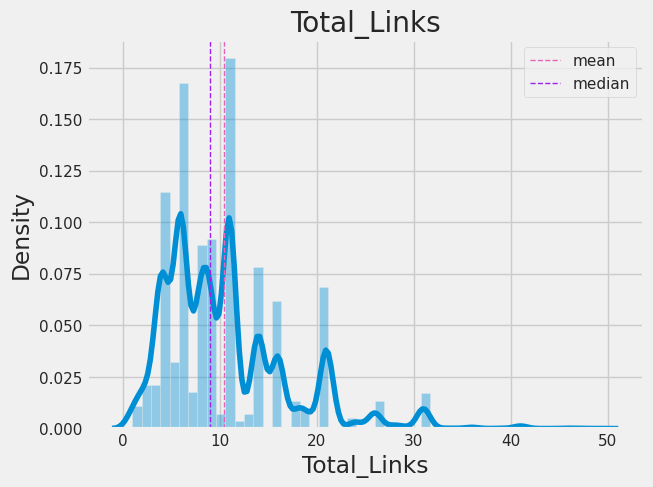

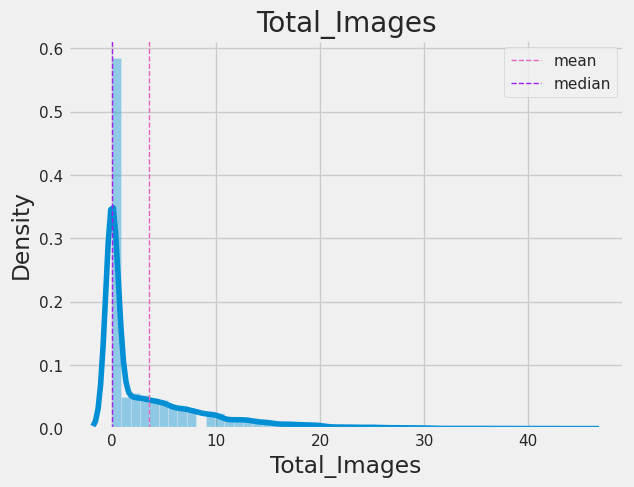

In [ ]:
#Checking the distribution of other null values to find the correct way to impute.
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
  sns.distplot(x=df[cat], hist= True);
  feature = df[cat]
  plt.axvline(feature.mean(), color='#e664b7', linestyle='dashed', linewidth=1,label= 'mean');
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=1,label='median');
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(f'{cat.title()}');
  plt.xlabel(cat)
  plt.show()
  print('='*120)

>We will use the mean for the total past communication and the median for the other two, as the median is the most robust against outliers, because only the total past communication shows practically normal distribution and the other two show right skew.

In [ ]:
#Replacing null values based on their distribution
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace = True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

>The central tendency limit theorem is used to replace null values in missing value imputation techniques,It indicates that, provided the sample size is sufficient, the mean's sampling distribution will always be normally distributed.

>Location was categorical data, thus it was crucial to replace the values using mode techniques because it was impossible to pinpoint exactly what those locations could be and because deleting them could result in data loss. Instead, I replaced the values using mode.

>The null value for total pas communication, which had a normal distribution, was replaced with the mean of the other two features, which were continuous data,the values could be replaced by either the mode or median. However, as the median is less impacted by outliers, it is the best strategy for right skew, so I chose to replace the null value with the median.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in nume_fe:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Links', 'Total_Images', 'Word_Count']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  #print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

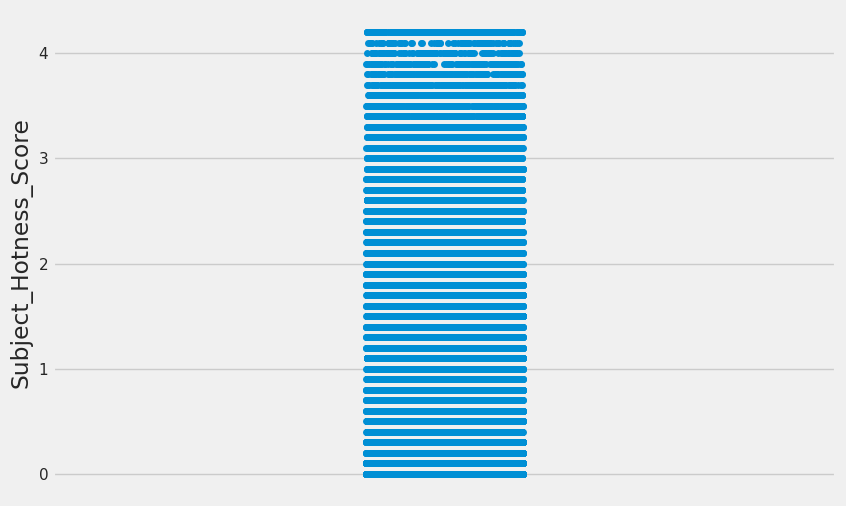

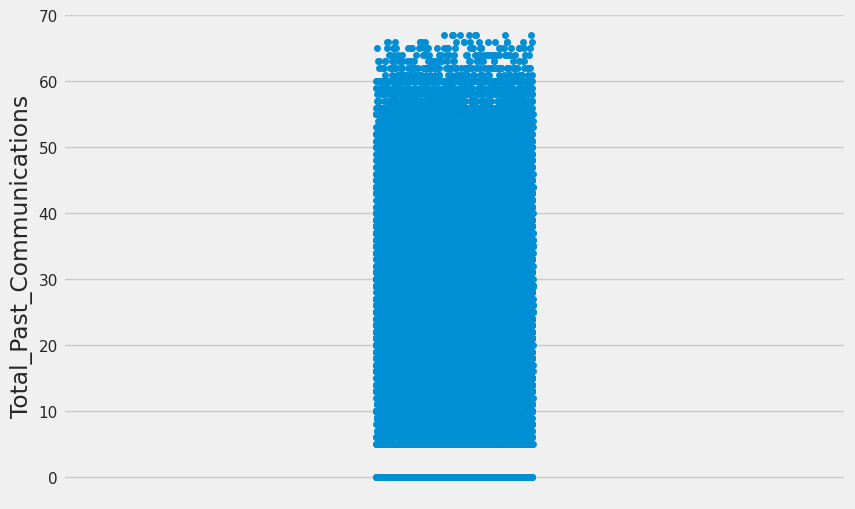

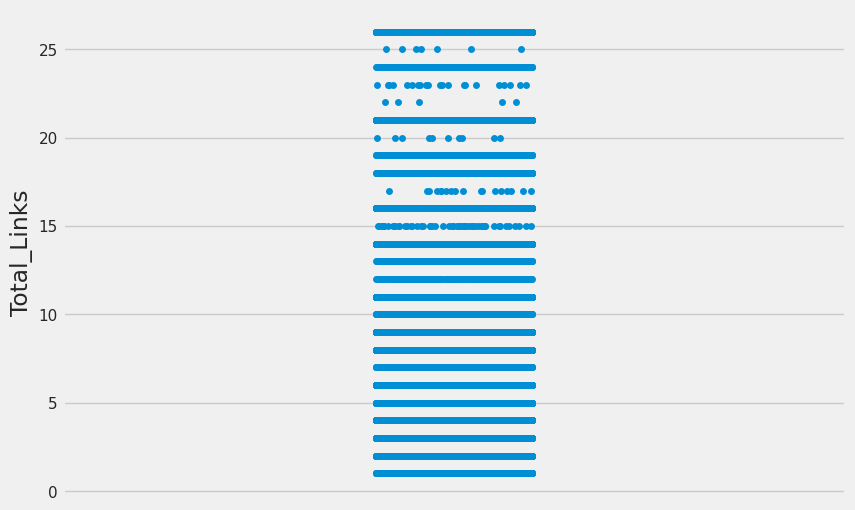

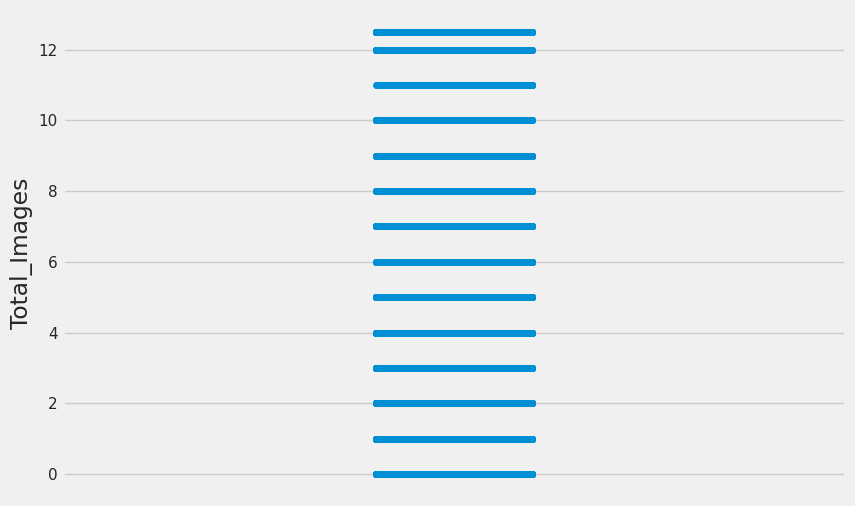

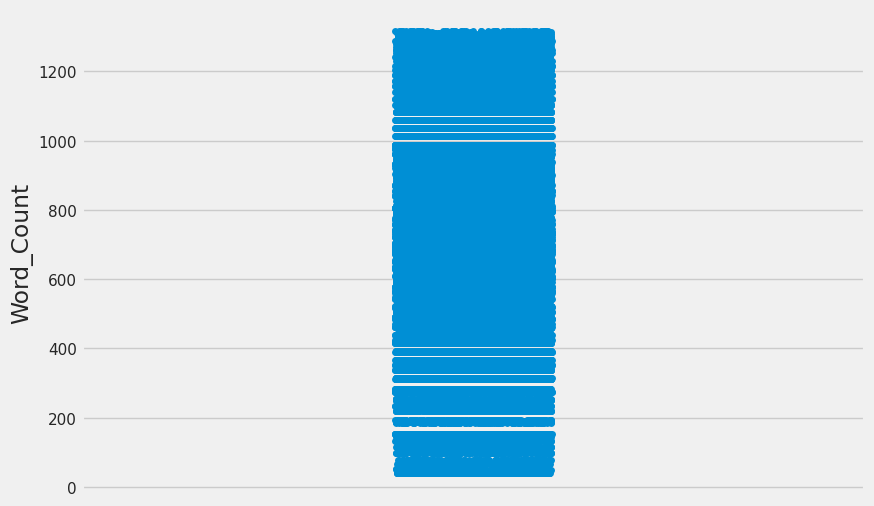

In [ ]:
# After Outlier Treatment, the dataset distribution is shown using a strip plot.
# Visualising  code for the numerical columns
for col in nume_fe:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])
  plt.show()
  print('='*120)

##### What all outlier treatment techniques have you used and why did you use those techniques?

>My approach to dealing with outliers in numerical values involves separating them into symmetric and non-symmetric groups first.Instead of just eliminating the max and min values, I decided to apply the capping technique to cap the upper and lower limit values as there was no symmetric data available.

### 3. Categorical Encoding

In [ ]:
#creating separate copy for categorial feature
cat_feature_encoding = cate_fe.copy()

In [ ]:
# removing id and dependent variable
cat_feature_encoding.remove('Email_ID')
cat_feature_encoding.remove('Email_Status')

In [ ]:
#Checking integer values of features represents an ordinal relationship.
from scipy.stats import chi2_contingency

# create a contingency table
for cat in cat_feature_encoding:
  contingency_table = pd.crosstab(df[cat], df['Email_Status'])

  # calculate the chi-squared statistic and p-value
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(cat)
  # check the p-value
  if p < 0.05:
      print("The categorical feature and the target variable have a significant association")
  else:
      print("The target variable and the categorical feature have no significant association")
  print('\n')


Email_Type
The categorical feature and the target variable have a significant association


Email_Source_Type
The categorical feature and the target variable have a significant association


Customer_Location
The target variable and the categorical feature have no significant association


Email_Campaign_Type
The categorical feature and the target variable have a significant association


Time_Email_sent_Category
The target variable and the categorical feature have no significant association




>* Among binary, count, target, and ordinal encoding approaches, one-hot encoding is the most effective because location fails to show any ordinal relationship. Even with a single hot encoding on site, there is a chance that it will lead to poor model performance; thus, the decision to keep or remove the column will be made entirely by trial and error.

In [ ]:
#creating copy
cdf = df.copy()

In [ ]:
# Encode your categorical columns
cdf = pd.get_dummies(cdf,columns= ['Time_Email_sent_Category','Customer_Location','Email_Campaign_Type'], drop_first = True)

In [ ]:
cdf.head()

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                   2.20                  2   
1  EMA00081000045360           2                   2.10                  1   
2  EMA00081000066290           2                   0.10                  1   
3  EMA00081000076560           1                   3.00                  2   
4  EMA00081000109720           1                   0.00                  2   

   Total_Past_Communications  Word_Count  Total_Links  Total_Images  \
0                      33.00      440.00         8.00          0.00   
1                      15.00      504.00         5.00          0.00   
2                      36.00      962.00         5.00          0.00   
3                      25.00      610.00        16.00          0.00   
4                      18.00      947.00         4.00          0.00   

   Email_Status  Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0             0                           0                           0   
1             0                           1                           0   
2             1                           1                           0   
3             0                           1                           0   
4             0                           1                           0   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   Customer_Location_E  Customer_Location_F  Customer_Location_G  \
0                    1                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    1                    0                    0   
4                    0                    0                    0   

   Email_Campaign_Type_2  Email_Campaign_Type_3  
0                      1                      0  
1                      1                      0  
2                      0                      1  
3                      1                      0  
4                      0                      1

#### What all categorical encoding techniques have you used & why did you use those techniques?

>In this case, I've applied one hot encoding approach to the customer location and email sent time categories.Because there is no ordinal relation, the rest of the categorical features already have integer values that display ordinal relations.

>These are the advantages of employing one-hot encoding:
* Preserves Categorical Information:
Binary vectors are created using one-hot encoding, where each category is represented by a distinct binary column.Machine learning algorithms may effectively handle categorical data by maintaining the category information.

>Removes Ordinal Assumptions:
* One-hot encoding treats categories as mutually exclusive, in contrast to label encoding, which gives integer values to categories and suggests an ordinal relationship between them.To avoid unintended assumptions in the data, this is crucial.

>Minimizes Bias:
* Preventing bias in machine learning models can be achieved by using one-hot encoding. When numerical representations of categorical data are used, it is possible for some categories to unintentionally be assigned greater weight in the model, producing biased outcomes. One-hot encoding solves this problem.

>Managing missing values in categorical variables:
* A new category can be created by one-hot encoding to handle missing values.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
cdf.drop(columns = ['Email_ID'], inplace = True)

In [ ]:
#Combining total images and links to find their percentage in total word count.
# Percentage of words that are links+image
cdf['Percentage_of_words_that_are_links_image'] = ((cdf['Total_Links']+ cdf['Total_Images'])/ cdf['Word_Count'])*100

In [ ]:
# Total Number of Images and link
cdf['Images_per_link'] = cdf['Total_Images'] + cdf['Total_Links']

In [ ]:
# Number of Images per link
cdf['Images_plus_link'] = cdf['Total_Images'] / cdf['Total_Links']

In [ ]:
#Dropping total link and image
cdf.drop(columns = ['Total_Links','Total_Images'], inplace = True)

In [ ]:
#Replacing infinity values with 0
np.isinf(cdf).values.sum()
cdf.replace([np.inf, -np.inf], 0, inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
cdf.shape

(68353, 19)

 Feature selection by removing columns from a dataset that have a low variance

In [ ]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns
          if column not in data.columns[var_thres.get_support()]]
          #var_thres.get_support() return boolean values on checking condition
  if "Email_Status" in concol:
    concol.remove("Email_Status")
  else:
    pass
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var

In [ ]:
# Calling the function
df_removed_var=dropping_constant(cdf)

Columns dropped: []


In [ ]:
#correlation matrix

corr = df_removed_var.corr()
cmap=sns.diverging_palette(6, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

Multicolinearity

In [ ]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Checking variable inflation factor
# The independent variables set
X = df_removed_var.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])

Email_Type
Email_Source_Type
Total_Past_Communications
Word_Count
Customer_Location_G
Email_Campaign_Type_2
Email_Campaign_Type_3


In [ ]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [ ]:
correlation(df_removed_var,0.6)

['Time_Email_sent_Category_3',
 'Email_Campaign_Type_3',
 'Images_plus_link',
 'Email_Campaign_Type_2']

In [ ]:
#dropping highly correlated values
df_removed=df_removed_var.drop(['Email_Campaign_Type_2','Customer_Location_G','Email_Source_Type'],axis=1)
df_removed.shape

(68353, 16)

In [ ]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_removed.copy()

#removing dependent variable from column
X.drop(columns=['Email_Status'], axis =1, inplace = True)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: round(x, 2))
vif_data[vif_data["VIF"] >= 8]["feature"].apply(print)

Series([], Name: feature, dtype: object)

In [ ]:
calc_vif(df_removed[[i for i in df_removed.describe().columns if i not in ['Email_Status']]])

variables  VIF
0                                 Email_Type 7.87
1                      Subject_Hotness_Score 2.80
2                  Total_Past_Communications 5.93
3                                 Word_Count 7.38
4                 Time_Email_sent_Category_2 3.79
5                 Time_Email_sent_Category_3 1.92
6                        Customer_Location_B 1.12
7                        Customer_Location_C 1.16
8                        Customer_Location_D 1.20
9                        Customer_Location_E 1.27
10                       Customer_Location_F 1.12
11                     Email_Campaign_Type_3 2.21
12  Percentage_of_words_that_are_links_image 2.32
13                           Images_per_link 6.25
14                          Images_plus_link 2.69

##### What all feature selection methods have you used  and why?

>I have preprocessed my data using a variety of feature selection techniques. Below is a summary of the techniques utilized along with their justifications:

1. **Features Dropping Constant or Near-Constant:** Features with constant or nearly constant variance were first eliminated. These are characteristics where the bulk of values are the same or very similar, meaning that the machine learning model can get little to no information from them. This technique improves the dataset's efficiency by lowering noise levels.


2. **Multicollinearity Pearson Correlation**: The multicollinearity between the predictor variables was found and addressed by use of the Pearson correlation coefficient. When two or more features in the dataset have a strong correlation and share similar data, this is known as multicollinearity.
Only metric variables are appropriate for Pearson correlations. The range of values for the correlation coefficient is -1 to 1.

• A number nearer zero denotes a weaker association; a value of exactly zero denotes no correlation.

• A higher positive correlation is implied by a value nearer 1.

• A higher negative correlation is indicated by a value nearer -1.

I found possible multicollinearity problems by looking at the correlation matrix and selecting variables with high absolute correlation values.


3. **VIF (Variance Inflation Factor)**: I computed the VIF for every predictor variable in order to evaluate multicollinearity quantitatively. The VIF calculates the degree to which a variable in the dataset may be explained by other factors. A variable may need to be dropped if its VIF falls between 5 and 10 (as stated), which indicates the presence of multicollinearity. I used the formula VIF = 1 / (1 - R^2), where R^2 is the linear regression coefficient of determination. This stage makes sure that the characteristics that are left over don't lead to undue multicollinearity.

>My goal is to enhance the quality of the dataset by following this sequence of feature selection methods,eliminate features that are redundant or irrelevant, and address issues of multicollinearity.Reducing the dimensionality and potential sources of bias will ultimately improve the performance of the machine learning models and prepare the data for them.



##### Which all features you found important and why?

In [ ]:
#Important features
df_removed.columns.to_list()

['Email_Type',
 'Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Email_Status',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3',
 'Customer_Location_B',
 'Customer_Location_C',
 'Customer_Location_D',
 'Customer_Location_E',
 'Customer_Location_F',
 'Email_Campaign_Type_3',
 'Percentage_of_words_that_are_links_image',
 'Images_per_link',
 'Images_plus_link']

In [ ]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=df_removed.drop(["Email_Status"],axis=1),y=df["Email_Status"])

Features  Importances
6                        Customer_Location_B         0.01
10                       Customer_Location_F         0.01
7                        Customer_Location_C         0.01
0                                 Email_Type         0.01
8                        Customer_Location_D         0.01
5                 Time_Email_sent_Category_3         0.02
9                        Customer_Location_E         0.02
4                 Time_Email_sent_Category_2         0.02
11                     Email_Campaign_Type_3         0.03
14                          Images_plus_link         0.07
13                           Images_per_link         0.11
1                      Subject_Hotness_Score         0.12
3                                 Word_Count         0.18
2                  Total_Past_Communications         0.19
12  Percentage_of_words_that_are_links_image         0.19

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : ",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : ",non_symmetric_feature)

Symmetric Distributed Features :  ['Total_Past_Communications', 'Customer_Location_B', 'Customer_Location_C', 'Customer_Location_F']
Skew Symmetric Distributed Features :  ['Email_Type', 'Subject_Hotness_Score', 'Word_Count', 'Email_Status', 'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3', 'Customer_Location_D', 'Customer_Location_E', 'Email_Campaign_Type_3', 'Percentage_of_words_that_are_links_image', 'Images_per_link', 'Images_plus_link']


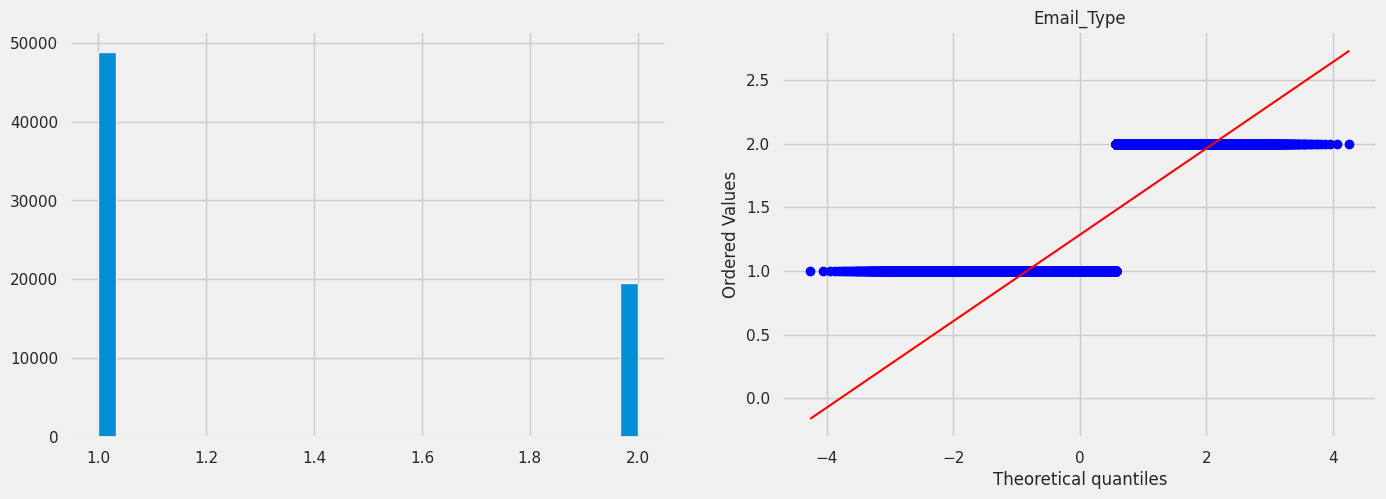

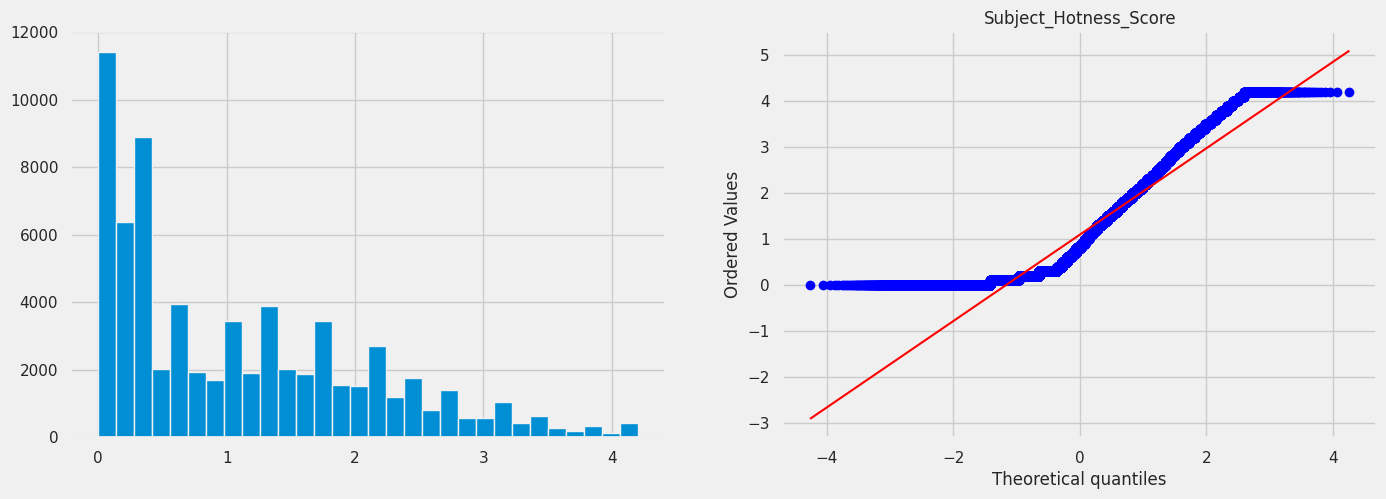

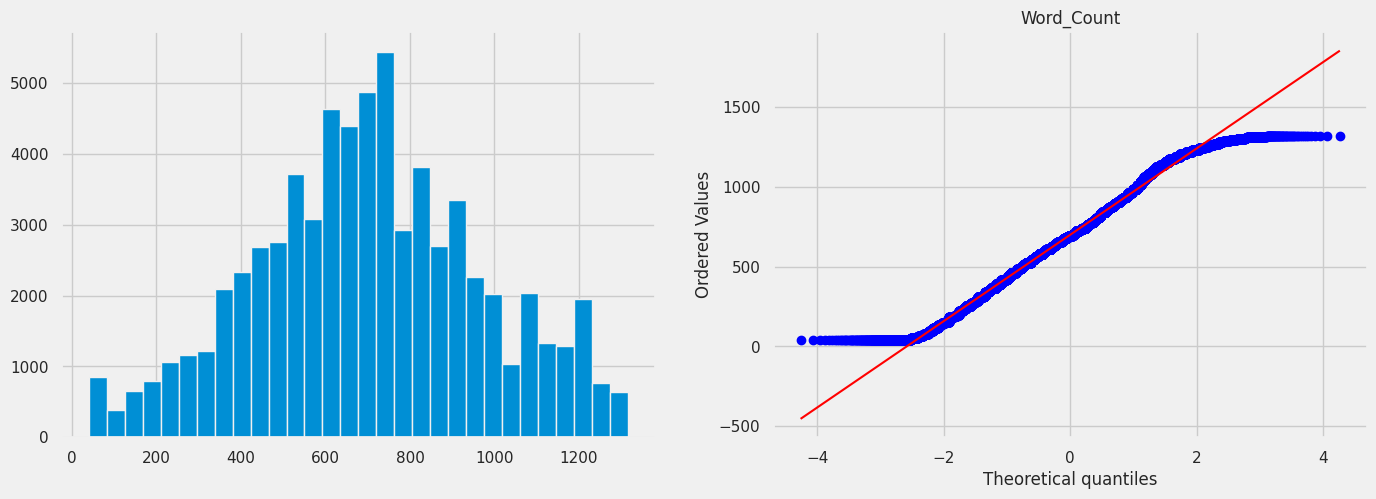

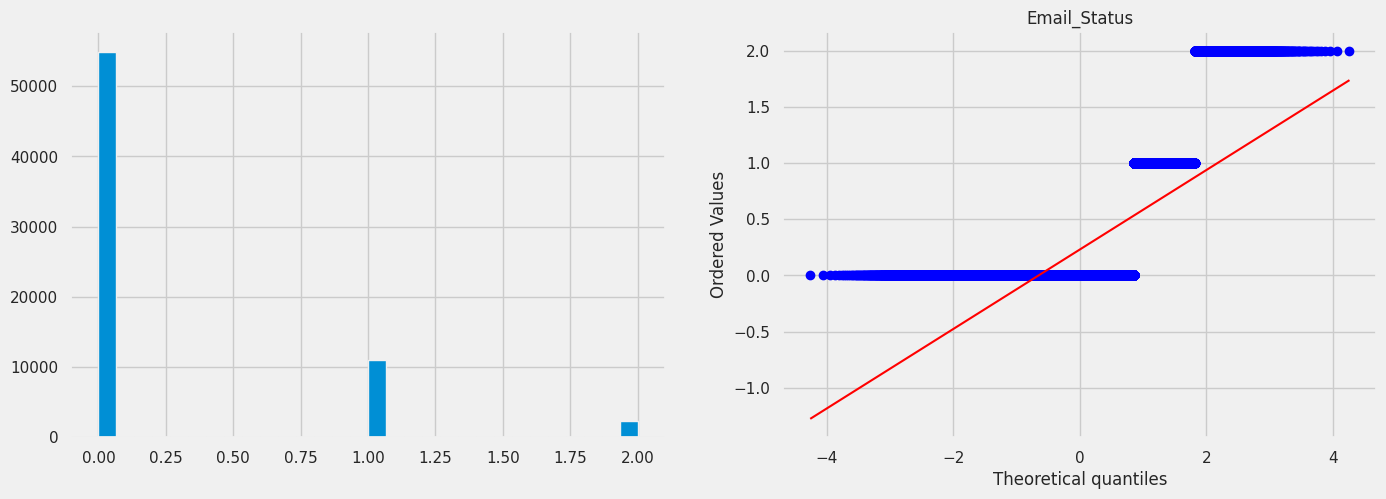

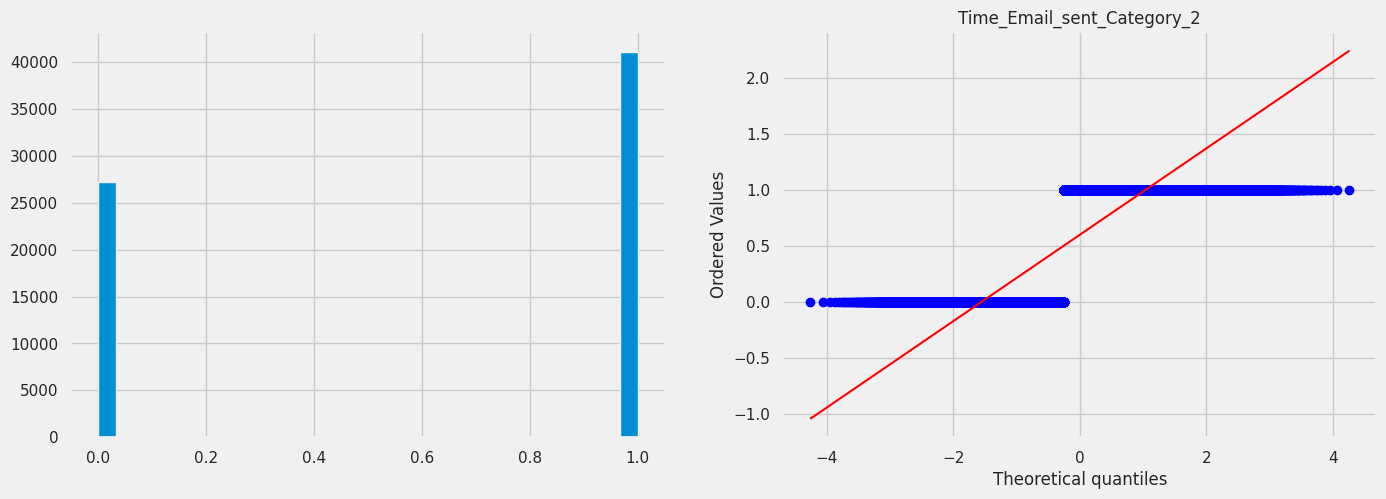

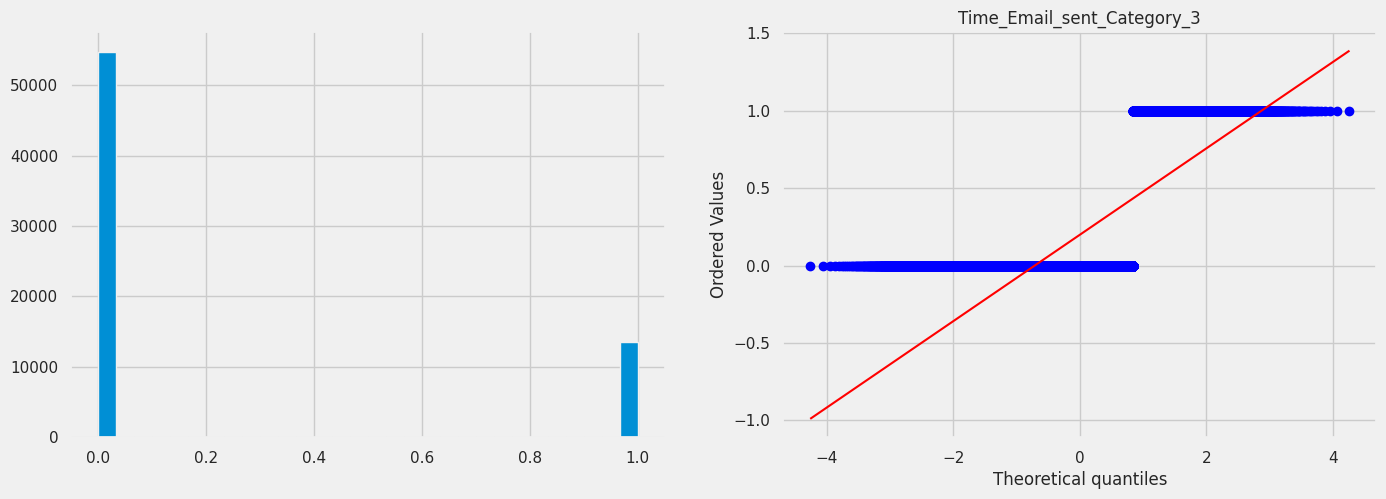

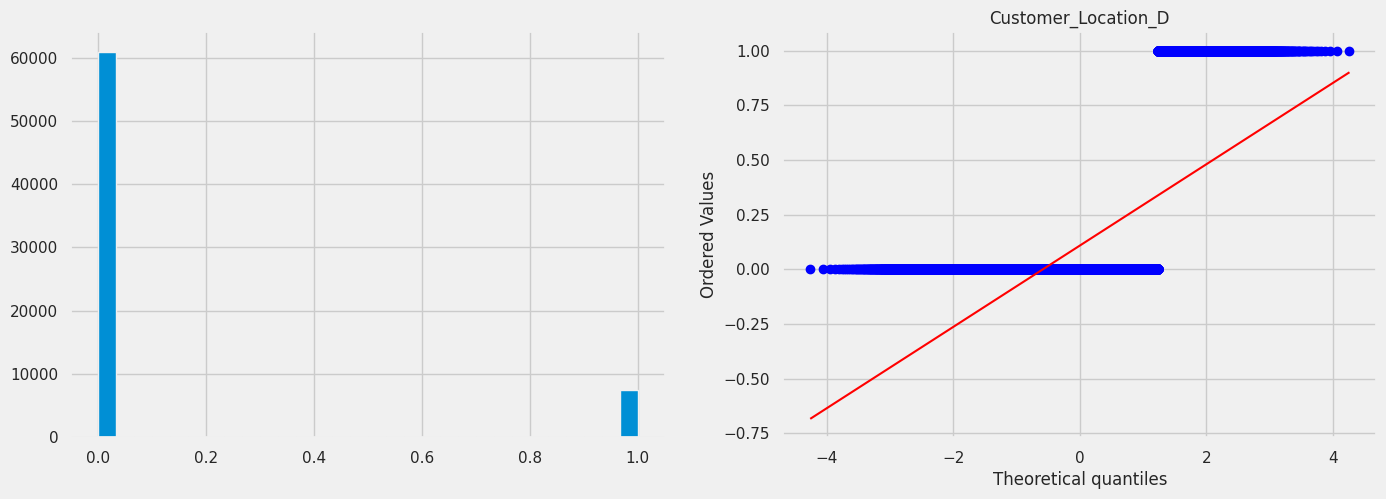

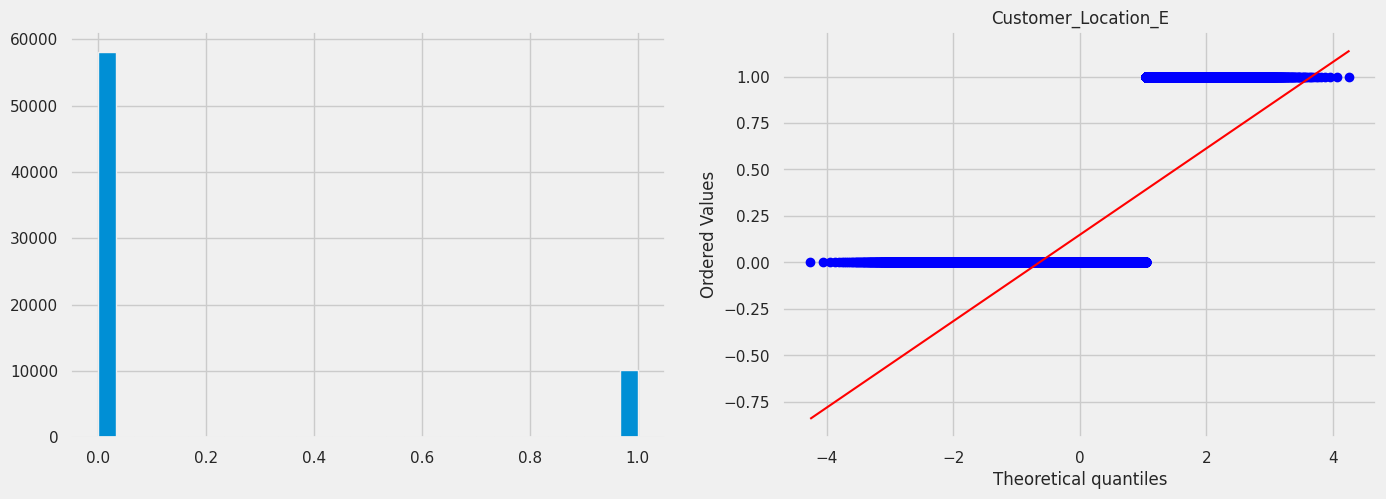

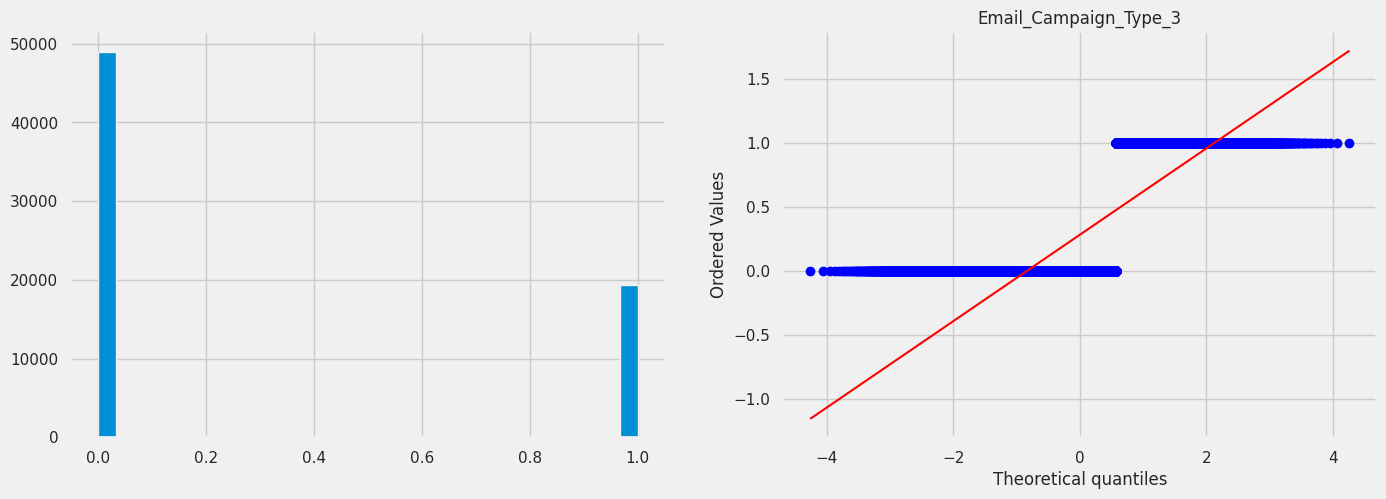

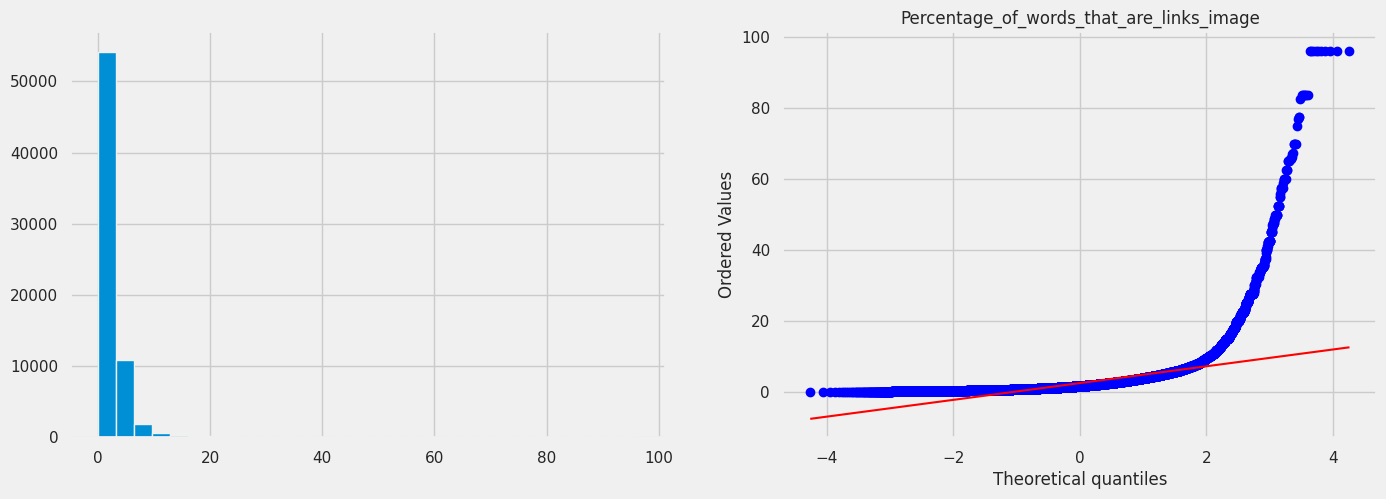

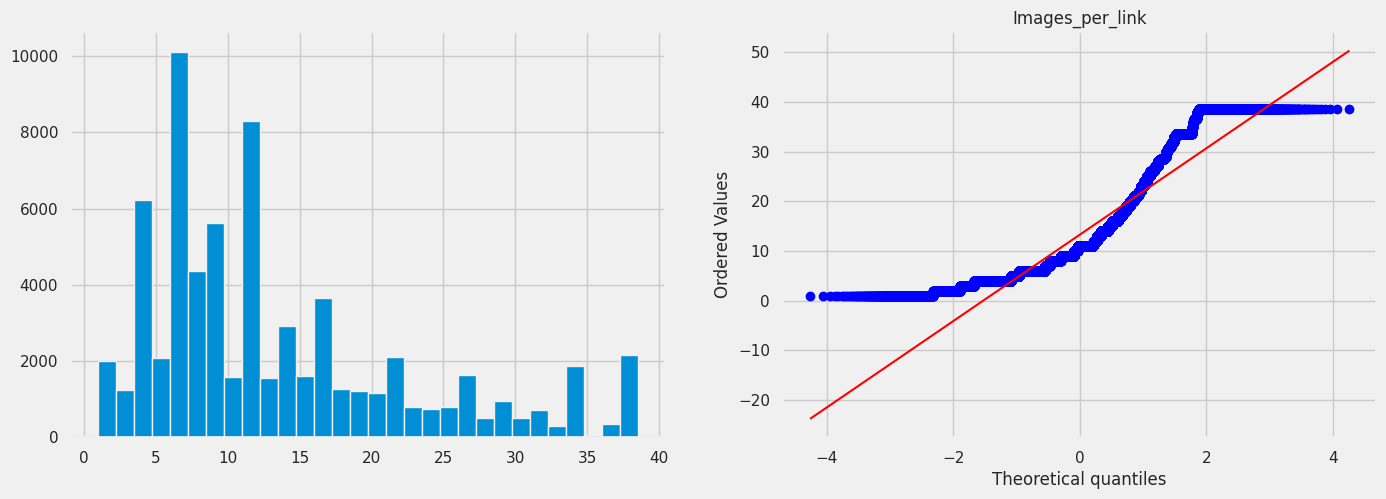

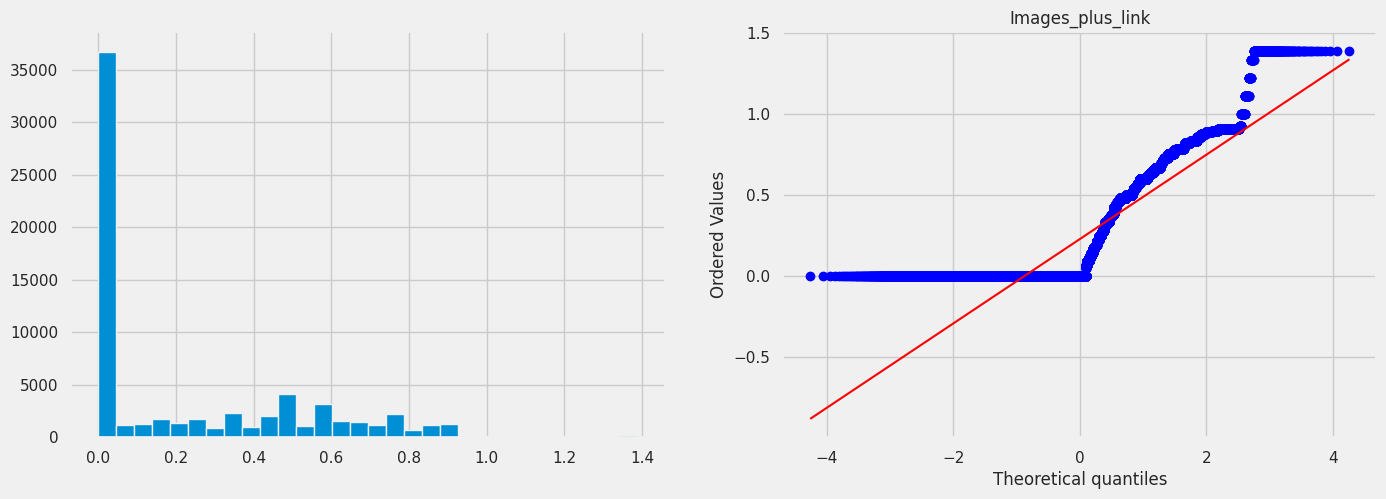

In [ ]:
#vizualization
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df_removed[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_removed[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

In [ ]:
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count']:
  df_removed[col]=np.sqrt(df_removed[col])

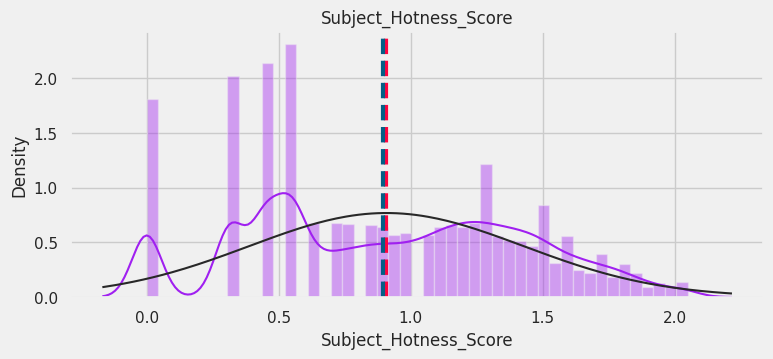

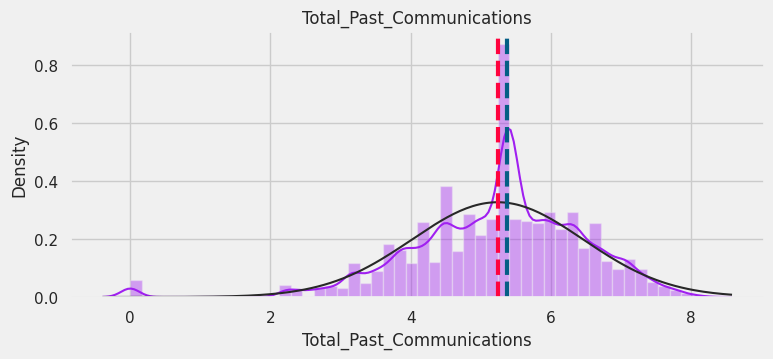

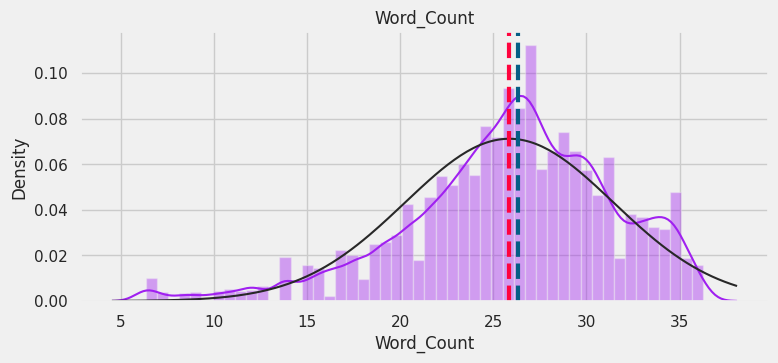

In [ ]:
for i,col in enumerate(['Subject_Hotness_Score','Total_Past_Communications','Word_Count']) :
    plt.figure(figsize = (15,20))
    plt.subplot(6,2,i+1);
    sns.distplot(df_removed[col], color = '#A020F0', fit = norm);
    feature = df_removed[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#055E85', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

Due to some features having a categorical feature, they didn't need transformation.I have transformed three features into a Gaussian normal distribution by using a square root transformation.

### 6. Data Scaling

Scaling your data

In [ ]:
# Checking the data
df_removed.head()

Email_Type  Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
0           1                   1.48                       5.74       20.98   
1           2                   1.45                       3.87       22.45   
2           2                   0.32                       6.00       31.02   
3           1                   1.73                       5.00       24.70   
4           1                   0.00                       4.24       30.77   

   Email_Status  Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0             0                           0                           0   
1             0                           1                           0   
2             1                           1                           0   
3             0                           1                           0   
4             0                           1                           0   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   Customer_Location_E  Customer_Location_F  Email_Campaign_Type_3  \
0                    1                    0                      0   
1                    0                    0                      0   
2                    0                    0                      1   
3                    1                    0                      0   
4                    0                    0                      1   

   Percentage_of_words_that_are_links_image  Images_per_link  Images_plus_link  
0                                      1.82             8.00              0.00  
1                                      0.99             5.00              0.00  
2                                      0.52             5.00              0.00  
3                                      2.62            16.00              0.00  
4                                      0.42             4.00              0.00

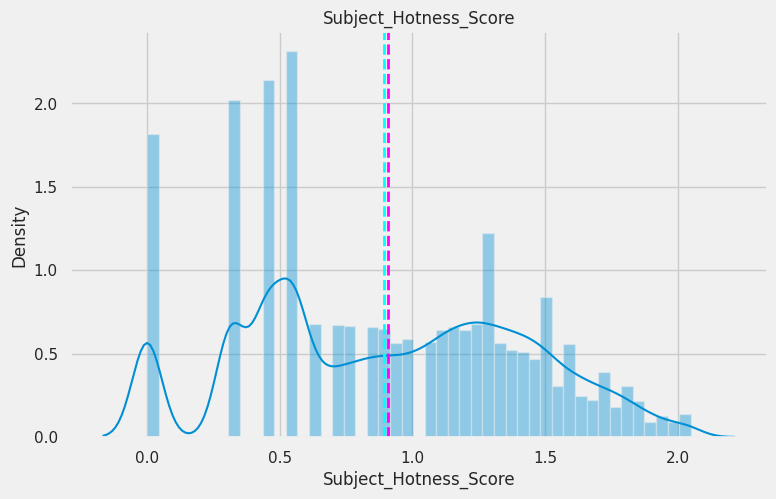

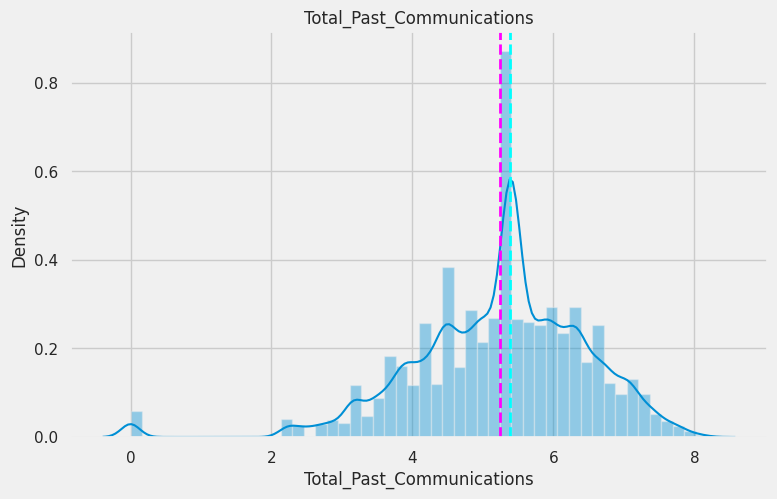

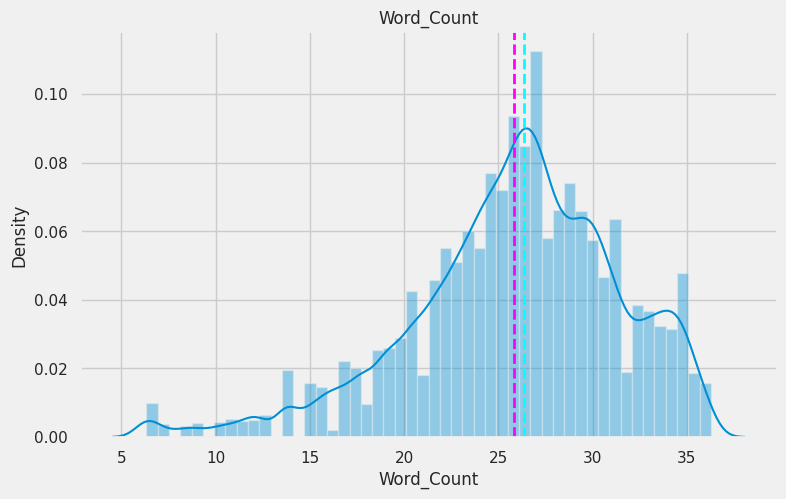

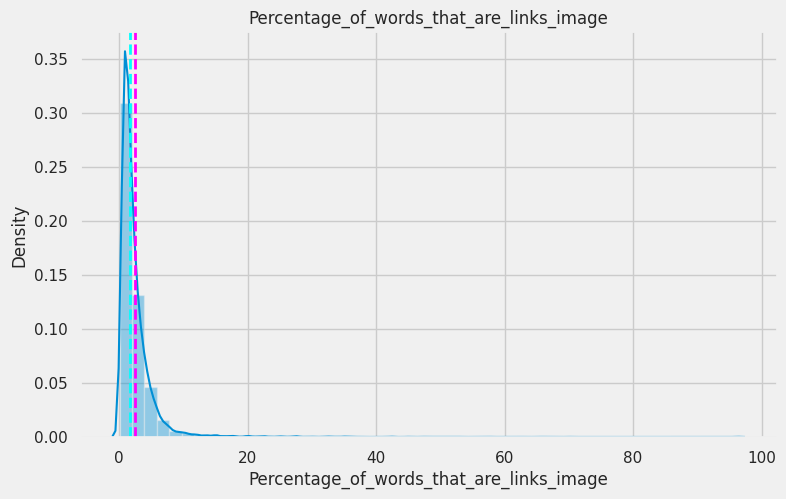

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Percentage_of_words_that_are_links_image']:
  fig=plt.figure(figsize=(8,5))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

In [ ]:
#Standard scaler
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Percentage_of_words_that_are_links_image']:
  df_removed[col] = StandardScaler().fit_transform(df_removed[col].values.reshape(-1, 1))

In [ ]:
df_removed.head()

Email_Type  Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
0           1                   1.11                       0.41       -0.87   
1           2                   1.04                      -1.12       -0.61   
2           2                  -1.14                       0.62        0.92   
3           1                   1.59                      -0.20       -0.21   
4           1                  -1.75                      -0.82        0.88   

   Email_Status  Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0             0                           0                           0   
1             0                           1                           0   
2             1                           1                           0   
3             0                           1                           0   
4             0                           1                           0   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   Customer_Location_E  Customer_Location_F  Email_Campaign_Type_3  \
0                    1                    0                      0   
1                    0                    0                      0   
2                    0                    0                      1   
3                    1                    0                      0   
4                    0                    0                      1   

   Percentage_of_words_that_are_links_image  Images_per_link  Images_plus_link  
0                                     -0.18             8.00              0.00  
1                                     -0.41             5.00              0.00  
2                                     -0.54             5.00              0.00  
3                                      0.04            16.00              0.00  
4                                     -0.57             4.00              0.00

##### Which method have you used to scale you data and why?

>It is advisable to scale features when utilizing algorithms that presume comparable feature ranges. Since our features in this instance had a distribution that was close to typical, we scaled them using traditional methods. It is noteworthy that in cases where feature ranges are not too diverse, feature scaling may not always be required. Standardization is better suitable for data that follows a Gaussian distribution, however normalization is advised for non-Gaussian distributed data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

>No dimensionality reduction is required.
>
>Although it's a popular method, dimensionality reduction may not always be required to reduce the amount of features in a dataset. Since there aren't too many characteristics in the current dataset, dimensionality reduction might not be necessary. Nonetheless, dimensionality reduction can assist in addressing issues like overfitting and sluggish computing when the number of features is quite high.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

> Not Applicable.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df_removed.drop("Email_Status",axis=1),df_removed["Email_Status"],
    test_size = 0.2, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (54682, 15)
Number transactions y_train dataset:  (54682,)
Number transactions X_test dataset:  (13671, 15)
Number transactions y_test dataset:  (13671,)


##### What data splitting ratio have you used and why?

>The 80/20 split was used by me because splitting into any ratio, including 80/20 or 70/30, doesn't affect the dataset except when there are fewer values. But there are two competing concernsThe variance of parameter estimates is greater with less training data.
>
>The trade-off between having sufficient testing data to lower variation in performance statistics and sufficient training data to lower variance in parameter estimates must also be taken into account. Generally speaking, the performance statistics are more variable the smaller the testing set, but the parameter estimations are more steady the larger the training set. As a result, the ideal splitting ratio is one that strikes a compromise between both issues and produces a model that performs well when applied to fresh data.
The Pareto principle, or 80/20, is a common ratio that is generally considered safe to use.

### 9. Handling Imbalanced Dataset

In [ ]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

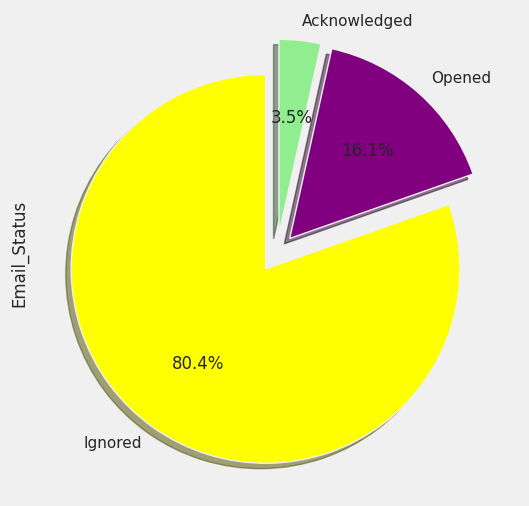

In [ ]:
# Dependant Variable Column Visualization
df['Email_Status'].value_counts().plot(kind='pie',figsize=(15,6),
                               autopct="%1.1f%%",startangle=90,
                               shadow=True,labels=['Ignored','Opened','Acknowledged'],
                               colors=['yellow','purple','lightgreen'],explode=[0.1,0.1,0.1]
                              );

##### Do you think the dataset is imbalanced? Explain Why.

>When working on supervised machine learning tasks, an imbalanced dataset—a dataset with unequal representation of the classes—is a common challenge. This indicates that one class has a lot more data points than the other. A balanced dataset, for example, would contain half of the data points for each of the two classes. The percentage of data points for each class varies in an unbalanced dataset, though. High class imbalances, like 90% of one class and 10% of the other, can lead to biased model predictions, even though minor imbalances are usually not an issue for machine learning algorithms. In these situations, conventional optimization criteria and performance metrics might not work as intended and might need to be changed.
>
>Our case has a data ratio of 80:16:4 for the dataset dependent columns. Therefore, it is evident that there will be bias during the model-building process and that there is a high likelihood of predicting the majority result. For this reason, the dataset needs to be balanced before moving on to the model construction phase.





In [ ]:
# Handling Imbalanced Dataset (If needed)
# Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (131817, 15)
Number transactions y_train dataset:  (131817,)
Number transactions X_test dataset:  (13671, 15)
Number transactions y_test dataset:  (13671,)


Class=0, n=43939 (33.333%)
Class=1, n=43939 (33.333%)
Class=2, n=43939 (33.333%)


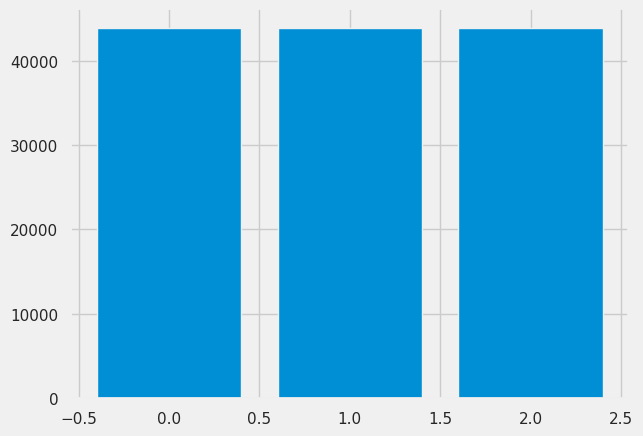

In [ ]:
#visualization of resampled data
from collections import Counter
counter = Counter(y_train)
for key,value in counter.items():
  per = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

>The 80:16:4 dataset was balanced by using the SMOTE (Synthetic Minority Over-sampling technique) technique.

>In machine learning, SMOTE is used to address challenges that come up when working with an unbalanced data set.We need to use strategies like SMOTE to improve the performance of ML algorithms because, in practice, unbalanced data sets are frequently encountered and most of them are quite vulnerable to unbalanced data.

>The disparity can be addressed by proposing balancing schemes that enhance the data to make it more balanced before training the classifier.The easiest way to achieve balancing is to either undersample the majority class or oversample the minority class by copying minority samples.

>SMOTE has the advantage of reducing the danger of overfitting by producing synthetic data points that differ somewhat from the original data points rather than exact replicas. All things considered, SMOTE is a better oversampling method for enhancing machine learning model performance on unbalanced datasets.

>I have utilized the SMOTE technique to balance the dataset due to its many advantages.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True,
            class_weight='balanced',multi_class='multinomial')
# Fit the Algorithm
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
# Checking the coefficients
lr.coef_

array([[ 5.62686000e-01,  3.54198890e-01, -7.89395490e-03,
         4.40177216e-01,  2.07066688e-01,  3.96888630e-01,
         9.15812584e-01,  7.38083095e-01,  6.75437248e-01,
         5.15195400e-01,  8.05703028e-01, -7.03904169e-01,
         3.35705922e-02,  3.46379013e-03, -3.06314681e-02],
       [-1.89100335e-01,  1.36294599e-01,  8.39501555e-03,
        -2.09412982e-01, -6.80105200e-03,  3.85589905e-02,
         7.57079880e-02, -8.52395874e-02, -2.15224154e-02,
         1.26697354e-02, -1.37786918e-01,  4.40204199e-01,
         4.90864133e-03, -1.24653386e-02,  1.52622196e-01],
       [-3.73585665e-01, -4.90493489e-01, -5.01060652e-04,
        -2.30764235e-01, -2.00265636e-01, -4.35447621e-01,
        -9.91520572e-01, -6.52843508e-01, -6.53914833e-01,
        -5.27865135e-01, -6.67916109e-01,  2.63699971e-01,
        -3.84792335e-02,  9.00154842e-03, -1.21990728e-01]])

>The weights or parameters of the linear equation used to forecast the target variable are represented by the coef_ attribute of a trained linear regression model. Each input feature's impact on the target variable is represented by the coefficients.

In [ ]:
# Checking the intercept value
lr.intercept_

array([-0.76565593,  0.3098849 ,  0.45577103])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability = lr.predict_proba(X_train)
test_probability = lr.predict_proba(X_test)

In [ ]:
# Get the predicted classes
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_pred_train,y_train)
test_accuracy = accuracy_score(y_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.529332331945045
The accuracy on test data is  0.6008338819398727


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[28855  6886  8198]
 [13593 13482 16864]
 [ 7729  8772 27438]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

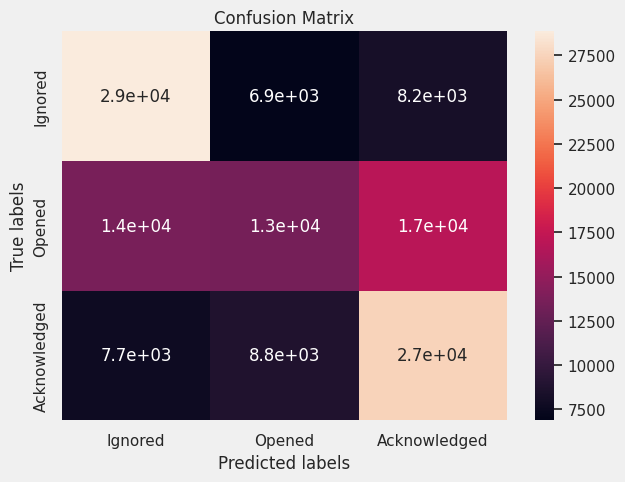

In [ ]:
# Visualizing evaluation Metric Score chart

# Get the confusion matrix for train

labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7324 1663 2015]
 [ 845  681  703]
 [ 125  106  209]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

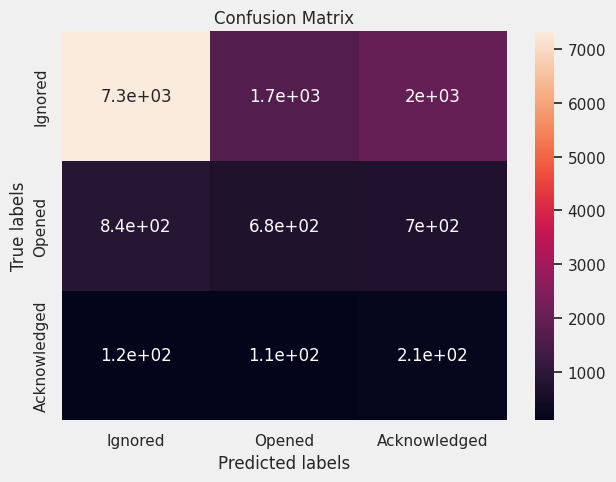

In [ ]:
# Get the confusion matrix for test

labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

<!-- * The number of cases that are actually class ignored but were predicted to be class ignored is 7324.

* The number of cases that are actually class Opened but were predicted to be class Ignored is 1663.

* 2015 is the number of cases that turn out to be class acknowledged despite being predicted as class ignored.

* The number of instances that are actually class Ignored but were predicted to be class Opened is 845.
  
* The number of cases that are class Opened in reality that were predicted to be class Opened is 681.
  
* The number of cases that are genuinely class acknowledged but were anticipated to be class opened is 703.

* The number of cases that are actually class ignored but were predicted to be class acknowledged is 125.

* The number of cases that are actually class opened but were anticipated to be class acknowledged is 106.

* The number of cases that are actually class acknowledged  and predicted to acknowledged  209 -->


> It is recommended to use the roc_auc_score function for multiclass classification instead of the roc_auc_ovr or roc_auc_ovo from the sklearn.metrics library, as the roc_auc_score function expects binary labels as the first argument and cannot handle multiclass labels when passed.

> Whereas roc_auc_ovo computes the AUC of ROC for multi-class classification by treating each class as a binary classification problem with one class being the positive class and the others being the negative classes, roc_auc_ovr computes the AUC of ROC for multi-class classification by treating each label as a binary classification problem.

In [ ]:
#Train
#printing classification report
print(metrics.classification_report(y_pred_train, y_train))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_train = roc_auc_score(y_train, train_probability,multi_class='ovr',average='weighted')
print(f"roc_auc_score_train : {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       0.66      0.58      0.61     50177
           1       0.31      0.46      0.37     29140
           2       0.62      0.52      0.57     52500

    accuracy                           0.53    131817
   macro avg       0.53      0.52      0.52    131817
weighted avg       0.57      0.53      0.54    131817

 
roc_auc_score_train : 0.7113083176329911


In [ ]:
#Test
#printing classification report
print(metrics.classification_report(y_pred, y_test))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_test = roc_auc_score(y_test, test_probability,multi_class='ovr',average='weighted')
print(f"roc_auc_score_test : {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      8294
           1       0.31      0.28      0.29      2450
           2       0.47      0.07      0.12      2927

    accuracy                           0.60     13671
   macro avg       0.48      0.41      0.39     13671
weighted avg       0.56      0.60      0.54     13671

 
roc_auc_score_test : 0.6941168988538923


>I built the model using the logistic regression approach. I didn't get the best outcome.
>
>I discovered that for the training dataset, the f1-score for ignored emails was 61%, recall was 58%, and precision was 66%. Emails that were opened in class 2 had precision of 31%, recall of 46%, and f1-score of 37%; emails that were acknowledged in class 3 had precision of 62%, recall of 52%, and f1-score of 57%. With a roc auc score of 71%, accuracy is 53%, average precision, recall, and f1_score are 53%, 52%, and 54%, respectively.
>
>I discovered that for the test dataset, the f1-score for ignored emails was 76%, recall was 88%, and precision was 67%. Email opened in class 2 had precision of 31%, recall of 28%, and f1-score of 29%; email acknowledged in class 3 had precision of 47%, recall of 7%, and f1-score of 12%. With a roc auc score of 69%, accuracy is 60% and average precision, recall, and f1_score are 48%, 41%, and 39%, respectively.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(fit_intercept=True, max_iter=10000,
            class_weight='balanced',multi_class='multinomial')
solvers = ['lbfgs']
penalty = ['l2']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.000000 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability2 = grid_result.predict_proba(X_train)
test_probability2 = grid_result.predict_proba(X_test)

In [ ]:
# Predict on the model
# Get the predicted classes
y_pred_train2 = grid_result.predict(X_train)
y_pred2 = grid_result.predict(X_test)

In [ ]:
#Train
#printing classification report
print(metrics.classification_report(y_pred_train2, y_train))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_train = roc_auc_score(y_train, train_probability2,multi_class='ovr',average='weighted')
print(f"roc_auc_score_train : {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       0.66      0.57      0.61     50580
           1       0.30      0.46      0.36     28248
           2       0.63      0.52      0.57     52989

    accuracy                           0.53    131817
   macro avg       0.53      0.52      0.52    131817
weighted avg       0.57      0.53      0.54    131817

 
roc_auc_score_train : 0.7113485389268488


In [ ]:
#Test
#printing classification report
print(metrics.classification_report(y_pred2, y_test))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_test = roc_auc_score(y_test, test_probability2,multi_class='ovr',average='weighted')
print(f"roc_auc_score_test : {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      8314
           1       0.30      0.28      0.29      2384
           2       0.48      0.07      0.12      2973

    accuracy                           0.60     13671
   macro avg       0.48      0.41      0.39     13671
weighted avg       0.56      0.60      0.54     13671

 
roc_auc_score_test : 0.6948812913535547


##### Which hyperparameter optimization technique have you used and why?

>In order to improve model performance, I utilized GridSearchCV, which utilizes the Grid Search technique to find the most effective hyperparameters.
>
>Finding the ideal hyperparameter settings will help us obtain the best prediction performance out of our model. However, the question of how to identify these ideal hyperparameter sets emerges. To identify the ideal hyperparameters, one can attempt the Manual Search approach, which involves a hit-and-trial process that would take a very long time to develop a single model.
>
>This led to the introduction of techniques like GridSearch and Random Search. Grid Search computes the performance for every possible combination of all the specified hyperparameters and their values, then chooses the hyperparameter with the optimal value. Because of this, processing becomes costly and time-consuming depending on how many hyperparameters are used.
>
>Cross-validation is done in GridSearchCV in addition to Grid Search. Cross-validation is applied to the model's training. I have utilized the GridsearCV method for hyperparameter optimization because of this.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

>Based on the training data, the model's classification report indicates that it earned a f1-score of 66%, a recall of 57%, and a precision of 61% for the ignored emails. The model produced a f1-score of 36%, a recall of 46%, and a precision of 30% for the email opened class. Ultimately, the model produced a f1-score of 57%, a recall of 52%, and a precision of 63% for the email acknowledged class. The model achieved an overall accuracy of 53% on the training data, with average values of 53%, 52%, and 52% for precision, recall, and f1-score, respectively. For the training set, the roc auc score was 0.711.
>
>The model obtained a f1-score of 76%, a recall of 88%, and a precision of 67% for the ignored emails, according to the classification report for the testing data. The model produced a f1-score of 29%, a recall of 28%, and a precision of 30% for the email opened class. Ultimately, the model produced a f1-score of 12%, a recall of 7%, and a precision of 48% for the email acknowledged class. The model achieved an overall accuracy of 60% on the testing data, with average values of 48%, 41%, and 39% for precision, recall, and f1-score, respectively. For the testing data, the roc auc score was 0.694.





### ML Model - 2

In [ ]:
# ML Model- 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train3 = rf_model.predict(X_train)
y_pred3 = rf_model.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability3 = rf_model.predict_proba(X_train)
test_probability3 = rf_model.predict_proba(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_pred_train3)
test_accuracy = accuracy_score(y_test,y_pred3)

print("On the train dataset, the accuracy is:", train_accuracy)
print("On the test dataset, the accuracy is:", test_accuracy)

On the train dataset, the accuracy is: 0.9997648254777457
On the test dataset, the accuracy is: 0.7465437788018433


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[43931     6     2]
 [   10 43923     6]
 [    2     5 43932]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

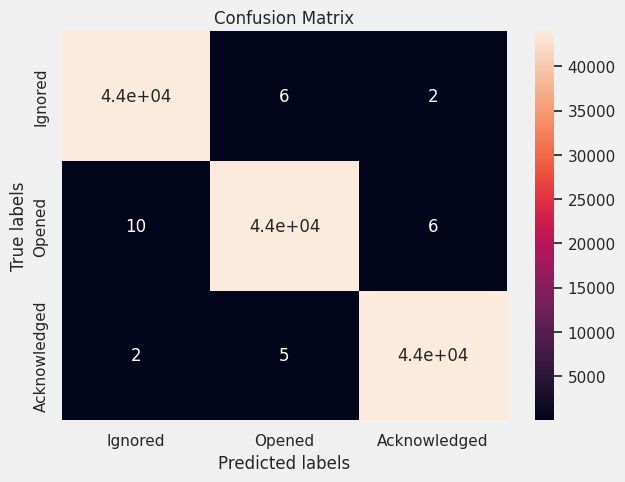

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_train, y_pred_train3)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[9447 1237  318]
 [1332  696  201]
 [ 218  159   63]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

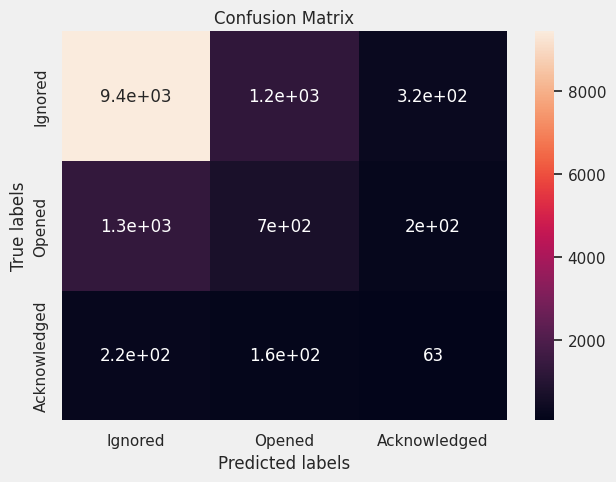

In [ ]:
# Get the confusion matrix for test

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_test, y_pred3)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#Result train
print(metrics.classification_report(y_pred_train3, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability3, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43943
           1       1.00      1.00      1.00     43934
           2       1.00      1.00      1.00     43940

    accuracy                           1.00    131817
   macro avg       1.00      1.00      1.00    131817
weighted avg       1.00      1.00      1.00    131817

 
roc_auc_score
0.9999996222315141


In [ ]:
#test result
print(metrics.classification_report(y_pred3, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability3, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10997
           1       0.31      0.33      0.32      2092
           2       0.14      0.11      0.12       582

    accuracy                           0.75     13671
   macro avg       0.44      0.43      0.43     13671
weighted avg       0.74      0.75      0.75     13671

 
roc_auc_score
0.717660811432228


>To build the model, I employed the Random Forest algorithm. I saw overfitting as soon as I arrived.
>
>All aspects of the training dataset were found to be almost 100%.
>
>I discovered 86% precision, 86% recall, and 86% f1-score for ignored emails in the test dataset. Email opened in class 2 had a precision of 31%, recall of 33%, and f1-score of 32%; email acknowledged in class 3 had a precision of 14%, recall of 10%, and f1-score of 12%. With a roc auc score of 71%, accuracy is 75% and average precision, recall, and f1_score are 44%, 43%, and 43%, respectively.

In [ ]:
#finding important feature
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
#sorting in descending order
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
2                  Total_Past_Communications                0.20
1                      Subject_Hotness_Score                0.16
3                                 Word_Count                0.16
12  Percentage_of_words_that_are_links_image                0.16
13                           Images_per_link                0.12
14                          Images_plus_link                0.07
11                     Email_Campaign_Type_3                0.03
0                                 Email_Type                0.02
4                 Time_Email_sent_Category_2                0.02
5                 Time_Email_sent_Category_3                0.01
6                        Customer_Location_B                0.01
7                        Customer_Location_C                0.01
8                        Customer_Location_D                0.01
9                        Customer_Location_E                0.01
10                       Customer_Location_F                0.01

In [ ]:
#Finding importance
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

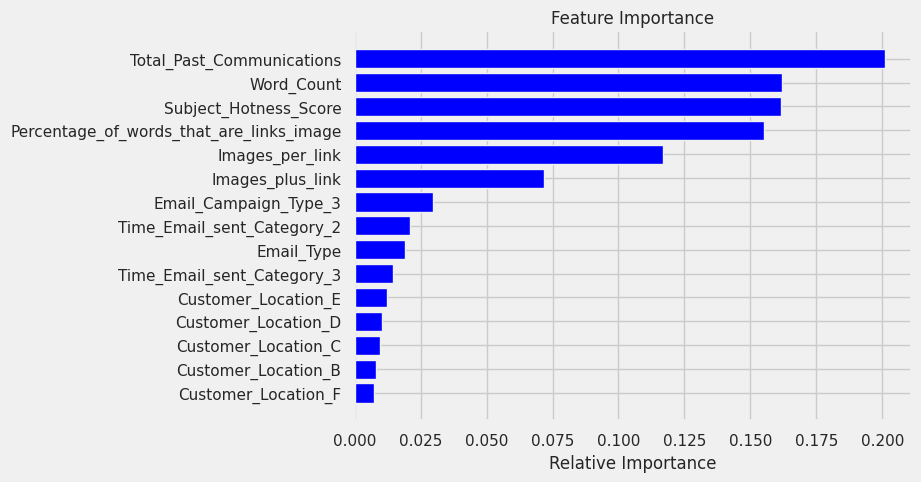

In [ ]:
#PlottingS
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1', verbose=2)

In [ ]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train4 = rf_grid.predict(X_train)
y_pred4 = rf_grid.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability4 = rf_grid.predict_proba(X_train)
test_probability4 = rf_grid.predict_proba(X_test)

In [ ]:
#result train
print(metrics.classification_report(y_pred_train4, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability4, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.75      0.60      0.66     54919
           1       0.22      0.45      0.29     21220
           2       0.67      0.53      0.59     55678

    accuracy                           0.55    131817
   macro avg       0.55      0.53      0.52    131817
weighted avg       0.63      0.55      0.58    131817

 
roc_auc_score
0.7426868026700104


In [ ]:
#test result
print(metrics.classification_report(y_pred4, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability4, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      9181
           1       0.21      0.27      0.23      1715
           2       0.61      0.10      0.17      2775

    accuracy                           0.65     13671
   macro avg       0.52      0.42      0.40     13671
weighted avg       0.65      0.65      0.61     13671

 
roc_auc_score
0.7546027801863247


##### Which hyperparameter optimization technique have you used and why?

>A method called GridSearchCV can be used to refine a model's hyperparameters and enhance its performance. The goal is to determine which hyperparameter combination will provide the model the best prediction accuracy. Finding the ideal hyperparameters by hand, however, can be time-consuming and unfeasible. As a result, techniques like Grid Search and Random Search have been created to streamline the procedure.
>
>In order to identify the ideal set of hyperparameters that yields the highest performance, Grid Search tests various combinations of these parameters and their values. Because there are so many possible possibilities, this method can be computationally expensive, but it offers a methodical manner to determine the optimal hyperparameters.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

>I discovered that the training dataset had 75 % precision, 560 % recall, and 66 % f1-score for ignored emails. For class II I. e. email opened received a 22 percent precision, 45 percent recall, 29 percent f1-score, and for class 3 i. e. Precision was obtained at 67%, recall at 53%, and f1-score at 59%.email acknowledged received a roc auc score of 74%, accuracy of 55%, average precision, recall, and f1_score of 55%, 53%, and 52%, respectively.
>
> I discovered that for the test dataset, the f1-score for ignored emails was 82 percent, recall was 90 percent, and precision was 75 percent. For class II I. e. email opened received a 27% recall rate, a 23% f1-score, and a 21% precision rate for class 3. e. email acknowledged received a precision of 61%, recall of 10%, and f1-score of 17%. Accuracy is 65%, with average precision, recall, and f1-score being 51%, 42%, and 41%, respectively, and a roc auc score of 75%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

>I evaluated the model's performance using a variety of metrics and determined how they might affect the company.
* **Accuracy**:The metric Accuracy represents the proportion of correctly classified instances relative to the total number of instances. It illustrates the model's overall efficacy in producing precise forecasts, which can benefit the company by boosting the model's perceived competence.
* **Precision**: quantifies the percentage of actual positive predictions among all the model's positive predictions. It shows that the model can reliably identify positive instances, which can help the company by lowering the number of false positive predictions.
* **Recall**: calculates the percentage of actual positive occurrences that are true positive predictions. This measure shows how well the model can find all positive examples, which can help the company by making sure no significant examples are overlooked.
* **F1**: Score can be used to balance the trade-off between recall and precision. It is a combination of the two. A high F1 score would suggest that the model is predicting the future accurately and avoiding false positives and false negatives, which would increase the model's overall effectiveness and benefit the company.
* **ROC AUC**: The model's ability to discern between positive and negative instances is measured by the ROC AUC metric. By guaranteeing that the model is producing accurate predictions, a high score on this metric means that the model can accurately classify instances as positive or negative. This can be advantageous for the business.
>
>These evaluation metrics suggest that the Random Forest Classifier is a viable business model. High scores on all metrics indicate that it can identify all positive instances, predict outcomes accurately, and classify instances as positive or negative, all of which would increase the model's overall effectiveness and benefit the business. Recall and f1_score are 51%, 42%, and 41%, respectively, with a 74 percent roc auc score.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
# Making predictions on train and test data

y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability5 = xg_models.predict_proba(X_train)
test_probability5 = xg_models.predict_proba(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_pred_train5)
test_accuracy = accuracy_score(y_test,y_pred5)

print("The accuracy on train dataset is :", train_accuracy)
print("The accuracy on test dataset is :", test_accuracy)

The accuracy on train dataset is : 0.7959747225319951
The accuracy on test dataset is : 0.772438007461049


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[40856  1903  1180]
 [ 7298 26379 10262]
 [ 1909  4342 37688]]


[Text(0.5, 0, 'Ignored'), Text(1.5, 0, 'Opened'), Text(2.5, 0, 'Acknowledged')]

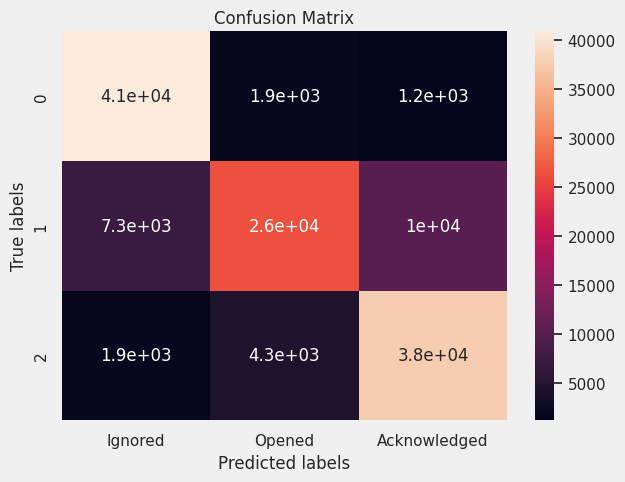

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_train, y_pred_train5)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

[[9983  685  334]
 [1450  492  287]
 [ 234  121   85]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

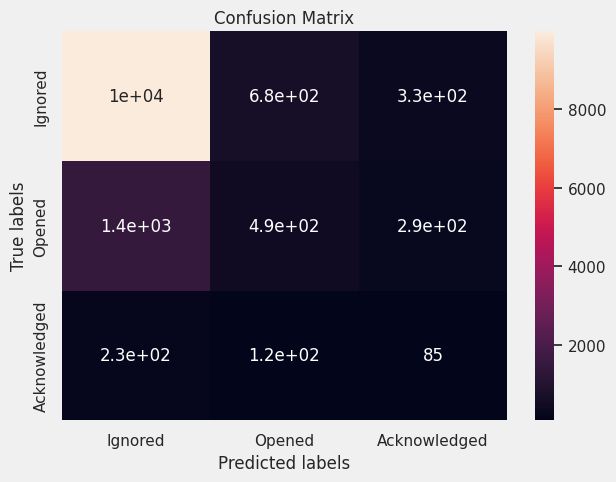

In [ ]:
# Get the confusion matrix for test
labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_test, y_pred5)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#result train
print(metrics.classification_report(y_pred_train5, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability5, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     50063
           1       0.60      0.81      0.69     32624
           2       0.86      0.77      0.81     49130

    accuracy                           0.80    131817
   macro avg       0.80      0.80      0.79    131817
weighted avg       0.82      0.80      0.80    131817

 
roc_auc_score
0.9278787694201168


In [ ]:
#test result
print(metrics.classification_report(y_pred5, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability5, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     11667
           1       0.22      0.38      0.28      1298
           2       0.19      0.12      0.15       706

    accuracy                           0.77     13671
   macro avg       0.44      0.45      0.44     13671
weighted avg       0.81      0.77      0.79     13671

 
roc_auc_score
0.7412421736350941


>My findings for the training dataset showed that the f1-score for ignored emails was 90%, recall was 85%, and precision was 95%. Regarding class II I. e. 62 percent precision, 82 percent recall, and 70 percent f1-score were obtained for email opened in class 3. e. accuracy is 81%, average precision, recall, and f1_score are 81%, 81%, and 81%, respectively, with a email acknowledged received precision of 87%, recall of 77%, and f1-score of 82%. The roc auc score of 93%
>
>My findings for the test dataset showed that the f1-score for ignored emails was 89%, recall was 85%, and precision was 93%. Regarding class II I. e. emails opened received a 19% precision, 41% recall, 26% f1-score, and for class 3 I. e. email was acknowledged, and results showed that the email had 13 percent precision, 12 percent recall, and 13 percent f1-score. Accuracy was 79 percent, and the average precision, recall, and f1-score were 42 percent, 46 percent, and 43 percent, respectively, with a 75 percent return on accuracy.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.5s
[CV] END max_depth=4, min_sam

In [ ]:
#Best parameter
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data

y_pred_train6 = xg_grid1.predict(X_train)
y_pred6 = xg_grid1.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability6 = xg_grid1.predict_proba(X_train)
test_probability6 = xg_grid1.predict_proba(X_test)

In [ ]:
#Result train
print(metrics.classification_report(y_pred_train6, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability6, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77     48672
           1       0.42      0.59      0.49     30909
           2       0.74      0.63      0.68     52236

    accuracy                           0.66    131817
   macro avg       0.66      0.65      0.65    131817
weighted avg       0.69      0.66      0.67    131817

 
roc_auc_score
0.8357288979305416


In [ ]:
#Test result
print(metrics.classification_report(y_pred6, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability6, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      9990
           1       0.31      0.32      0.31      2169
           2       0.35      0.10      0.16      1512

    accuracy                           0.71     13671
   macro avg       0.49      0.43      0.44     13671
weighted avg       0.67      0.71      0.68     13671

 
roc_auc_score
0.7461780763607185


##### Which hyperparameter optimization technique have you used and why?

>GridSearchCV is a method for determining the ideal hyperparameters that can improve a model's performance. Finding the ideal hyperparameter values to yield precise prediction results is the primary goal. However, it can be time-consuming and impractical to manually search for these values through trial and error.
>
>Techniques like Grid Search and Random Search have been developed to deal with this problem. Specifically, Grid Search looks at every possible combination of hyperparameters and values to find the ideal set of hyperparameters that yield the best results. The computational cost of this can vary based on how many hyperparameters are used.
>
>In addition to using Grid Search, GridSearchCV carries out cross-validation while the model is being trained. This makes it easier to make sure the model is operating well with unknown data. For this reason, I optimized the hyperparameters in this project using GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

>I noticed that for the training dataset, the f1-score for ignored emails was 77%, recall was 73%, and precision was 81%. Email opened in class 2 received a precision of 42%, recollection of 59%, and f1-score of 49%; email acknowledged in class 3 received a precision of 74%, recall of 63%, and f1-score of 68%. With a roc auc score of 83%, accuracy is 66%, average precision, recall, and f1_score are 66%, 65%, and 65%, respectively.
>
> On the test dataset, I observed 80% accuracy and  88% of recall, as well as an 84% F1 score for ignored emails. For class 2, i.e. the opened email, an accuracy of 31%, a recall of 32% and an f1-score of 31% were achieved, and for class 3, i.e. a confirmed email, an accuracy of 35%, a recall of 10% and an f1-score of 16% were achieved is 71% and the average precision, recall and f1_score are 49%, 43% and 44% respectively a Roc-Auc score of 74%.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

>* In a corporate context, recall and precision are crucial assessment metrics for email campaign classification models.
* A high precision score means that the model is not producing false positive predictions, but rather correctly identifying people who are likely to interact with the campaign.
* A high recall score means that there are no missing campaign participants in the model.
* The trade-off between recall and precision is balanced by using the F1 score, which combines the two.
* The model's accuracy in classifying instances as positive or negative can be ascertained using ROC AUC, which is important in a business setting.
>
>Consequently, companies' primary metrics for assessing the efficacy of their email campaign classification model should be precision, recall, and F1 score

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

>The accuracy of my classification task was improved by using both the hyperparameter optimized XGBoost model and Random Forest.Following the evaluation of both models, I would like to compare their evaluation metrics.

----
**Hypertuned Random Forest Classifier**⚡
----
image.png
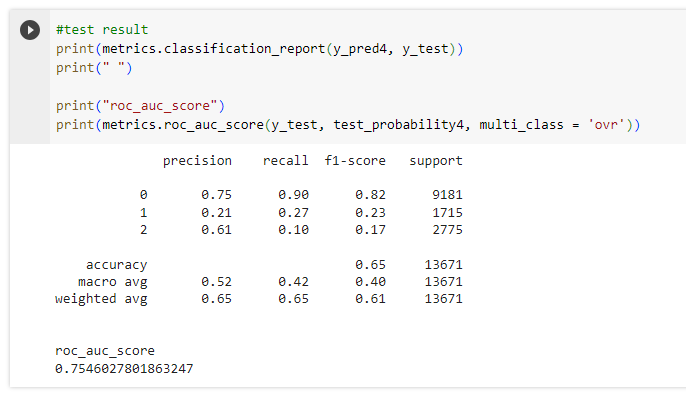
---

**Hypertuned XgBoost Classifier**⚡

---

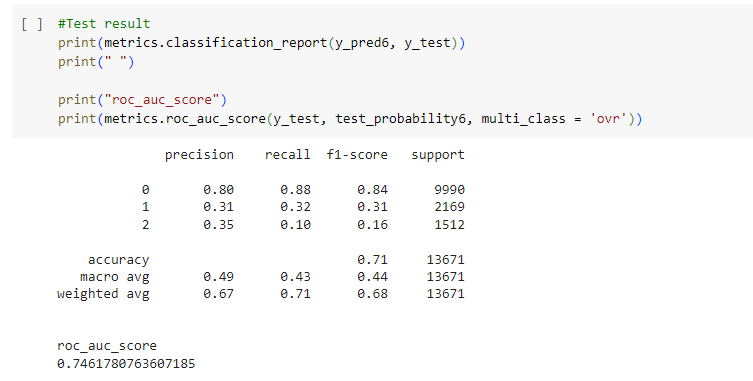

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

>When XGBoost and Random Forest models are compared on several evaluation metrics, the XGBoost model performs better in terms of F1-scores and has superior precision and recall (particularly for class 0).

1. Model XGBoost:

* F1-Score: Class 0 has the highest F1-score (0.84) out of the three classes, which are all moderate.
* ROC AUC Score: This model has a 0.746 ROC AUC, which indicates reasonable discriminatory power.
* Accuracy: At 71% overall, the accuracy is comparatively good.

2. Model of Random Forest:

* F1-Score: In particular for classes 1 and 2, the F1-scores are lower than those of the XGBoost model.
* ROC AUC Score: This model has a marginally higher ROC AUC score of 0.755.
* Accuracy: 65% of the data is accurate overall.

>Think about the business context and course distribution. Due to its higher F1-score for class 0, the XGBoost model could be chosen if it's the most important class.

> **Higher Overall Accuracy:**The Random Forest model's accuracy of 65% is not as accurate as the 71% achieved by the XGBoost model.

> **Good Discriminatory Power:** The XGBoost model's ROC AUC score of 0.746 indicates that it has a reasonable level of discriminatory power between classes. This implies that it has a respectable ability to distinguish between positive and negative cases.

>**Higher F1-Score for Key Classes** The XGBoost model has a higher F1-score, especially for the primary class (class 0), indicating better precision and recall for this class. This is crucial if class 0 represents a critical category in your problem.

>so for real user interaction, I have chosen XGBoost as the final prediction model.

# **Conclusion**

>* Based on the customer location feature, it appears that location has little bearing on email interaction, as the percentage ratio of emails that are read, acknowledged, and ignored is similar regardless of location.
* The Email Campaign Type feature showed that, although fewer emails were sent, Campaign Type 1 had a higher chance of being viewed, whereas Campaign Type 2 led to the majority of emails being ignored. Even though fewer emails were sent, Campaign 3 was successful because more emails were read and acknowledged.
* Email classification did not find the time of day an email was sent to be a significant factor based on feature importance or analysis. On the other hand, emails in category 2 sent in the middle of the day had a higher chance of being read and responded to
* The analysis showed that increasing the number of emails sent increases the likelihood that they will be read and acknowledged, underscoring the significance of developing a rapport with clients.
* Excessive word counts in emails are typically ignored. Emails that were returned unanswered also included more images.
* All continuous variables had outliers, with the exception of word count; however, eliminating them could result in information loss. Outliers were therefore retained in the analysis.
* Outliers and unbalanced data were handled most efficiently by the XGBoost algorithm, followed by the Random Forest Hyperparameter Tuned model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***